In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
import statsmodels.formula.api as sms
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [16]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv('ToyotaCorolla .csv',encoding='latin1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df.shape

(1436, 38)

In [5]:
df=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
data=df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [9]:
data[data.values==0.0]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [10]:
data.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

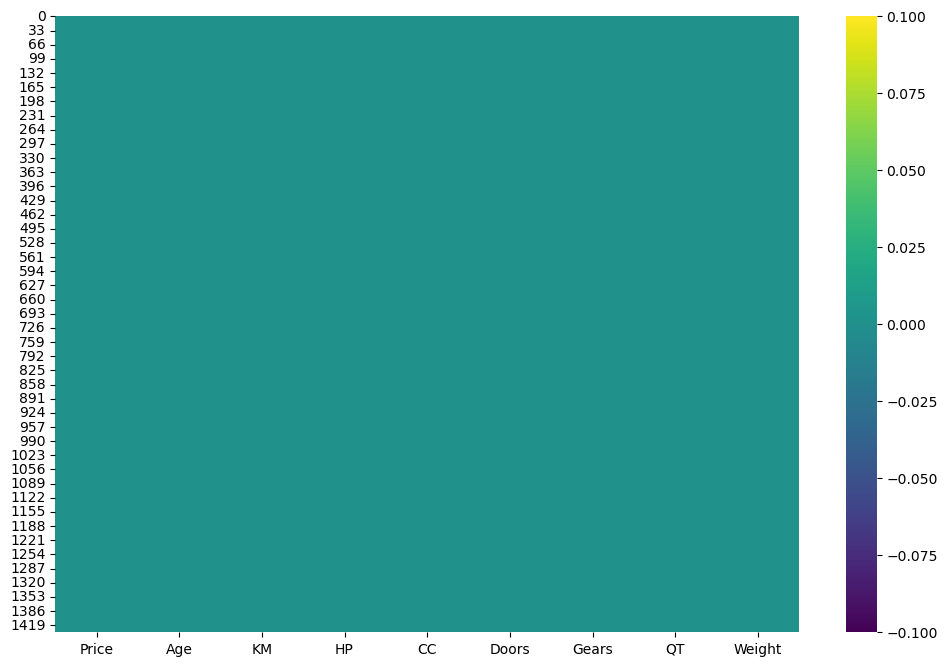

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),cmap='viridis');

In [ ]:
#Observation: Feature 'HP' has missing Values in the data set
#We will have to handle the missing values by observing the distribution and making the optimal choice

In [12]:
data.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73],
      dtype=int64)

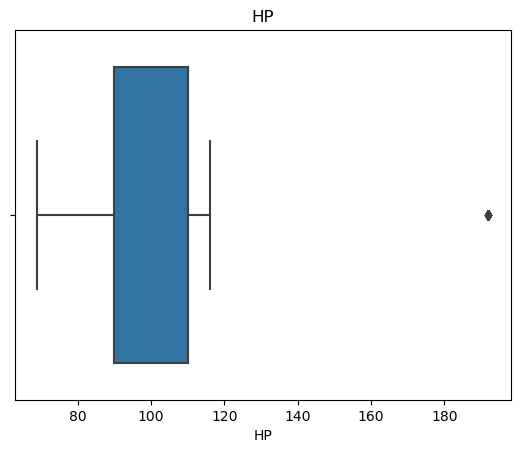

In [13]:
sns.boxplot(data['HP'])
plt.title('HP')
plt.show()

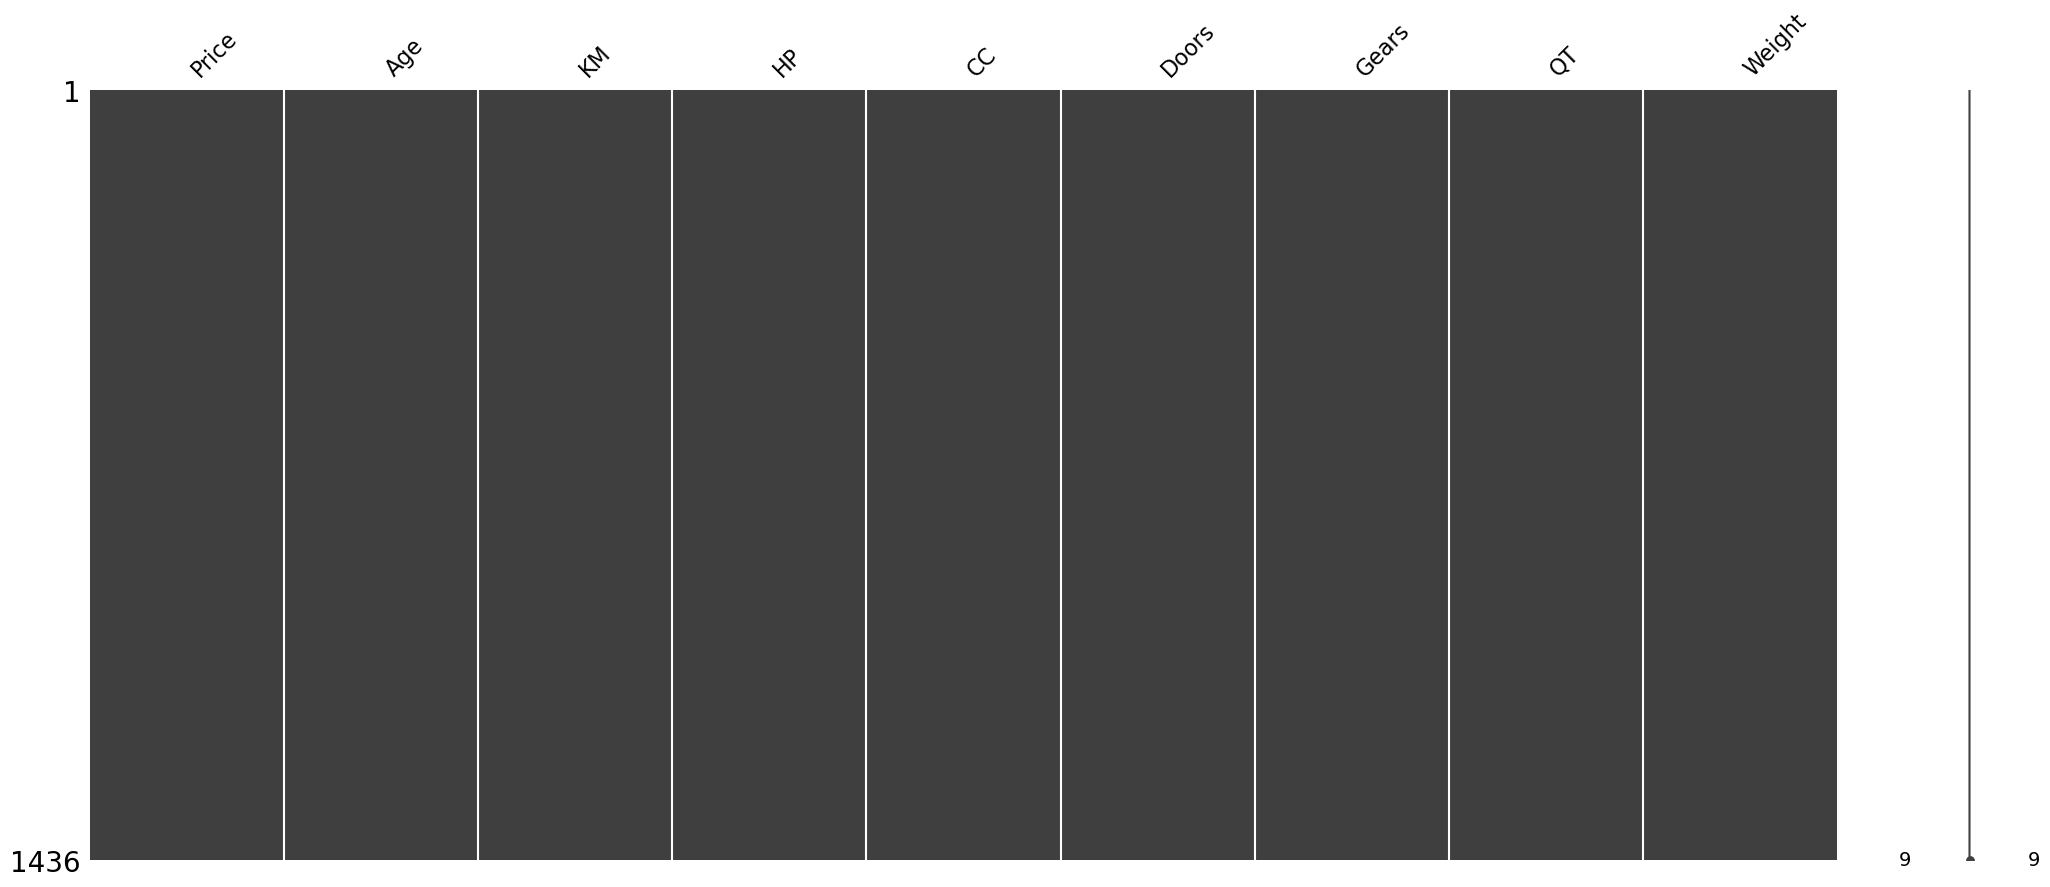

In [17]:
import missingno as mn
import warnings
warnings.filterwarnings('ignore')
mn.matrix(data);

In [18]:
data[data.duplicated()].shape

(1, 9)

In [19]:
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [20]:
data=data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [21]:
data=data.drop_duplicates().reset_index(drop=True)
data[data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [23]:
discrete_feature=[feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))


Discrete Variables Count: 5


In [24]:
continuous_feature=[feature for feature in data.columns if data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))


Continuous Feature Count 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Weight')

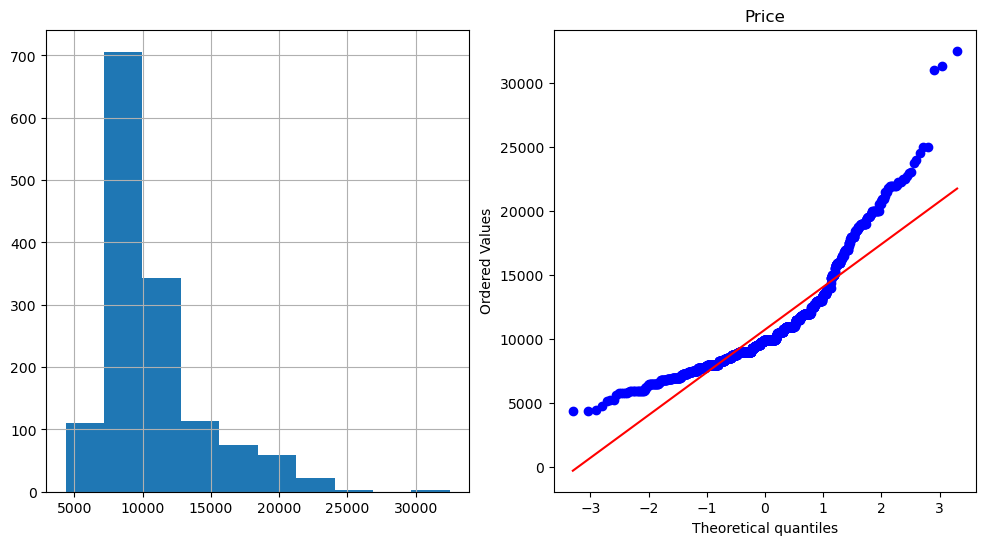

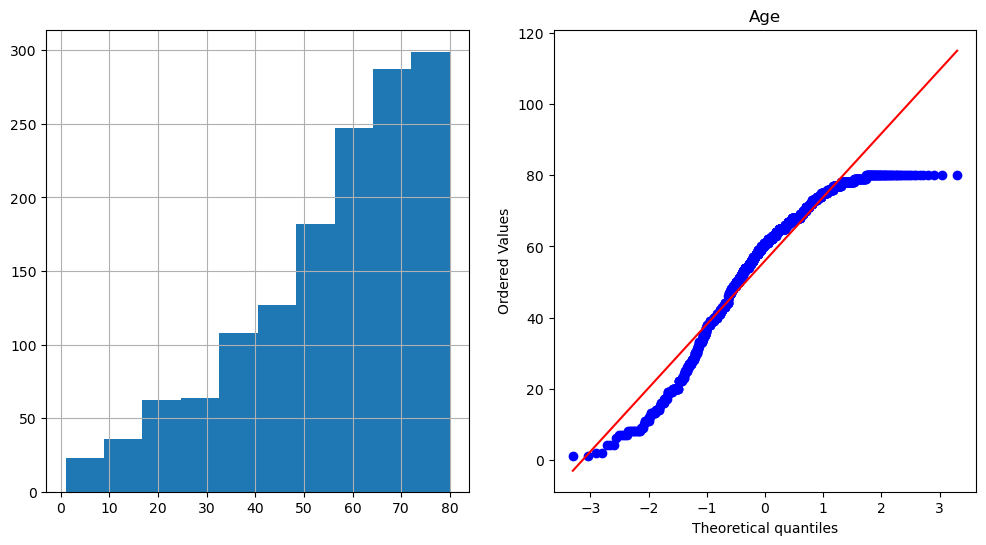

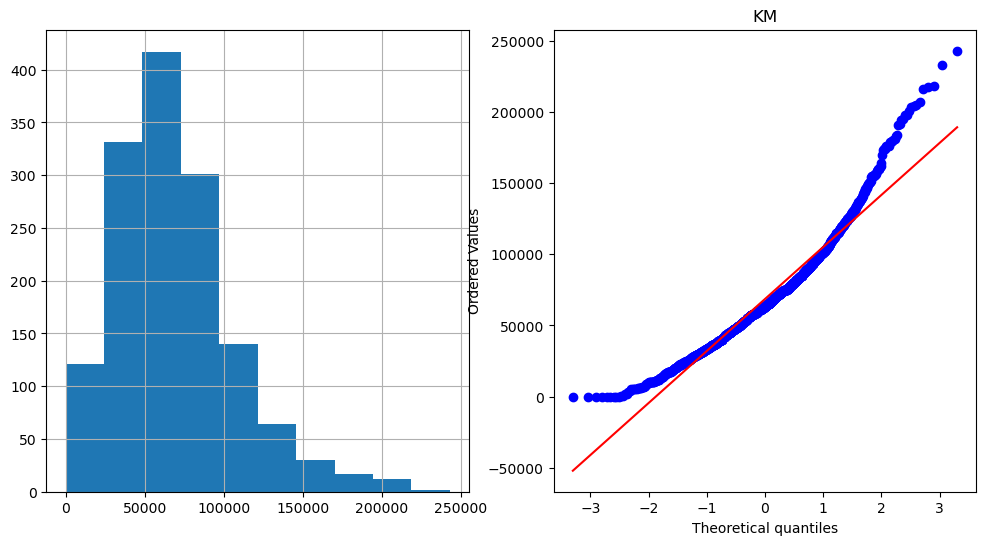

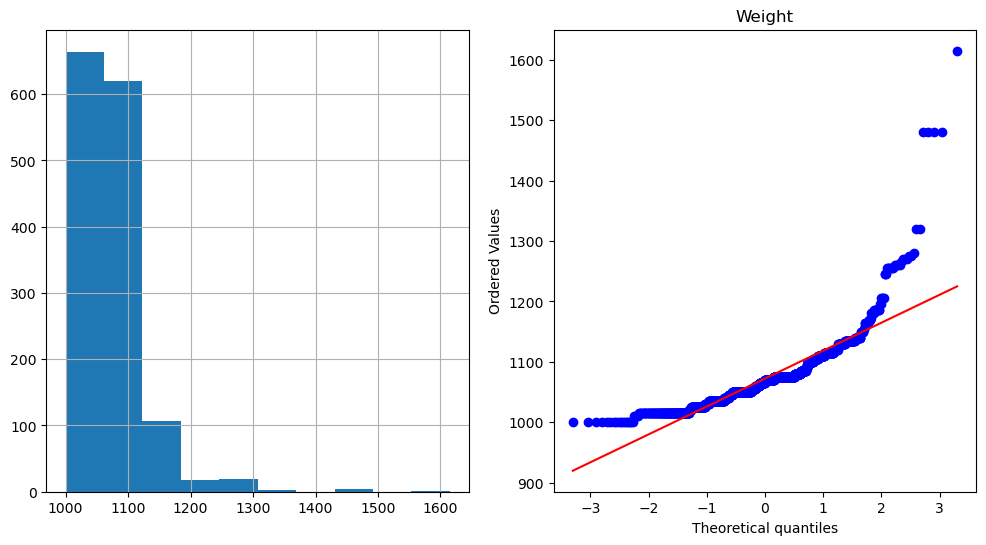

In [26]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
plot_data(data,'Price')
plt.title('Price')
plot_data(data,'Age')
plt.title('Age')
plot_data(data,'KM')
plt.title('KM')
plot_data(data,'Weight')
plt.title('Weight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Weight')

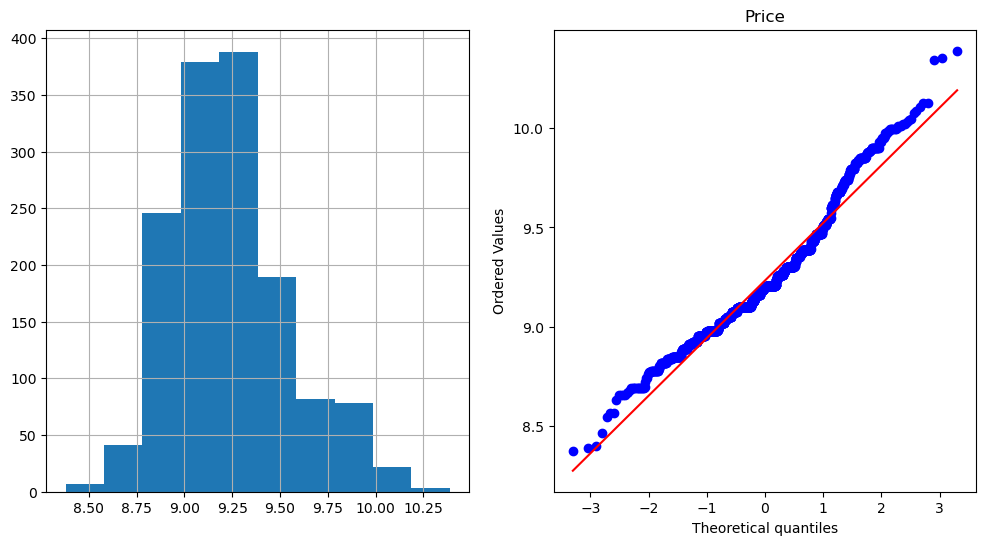

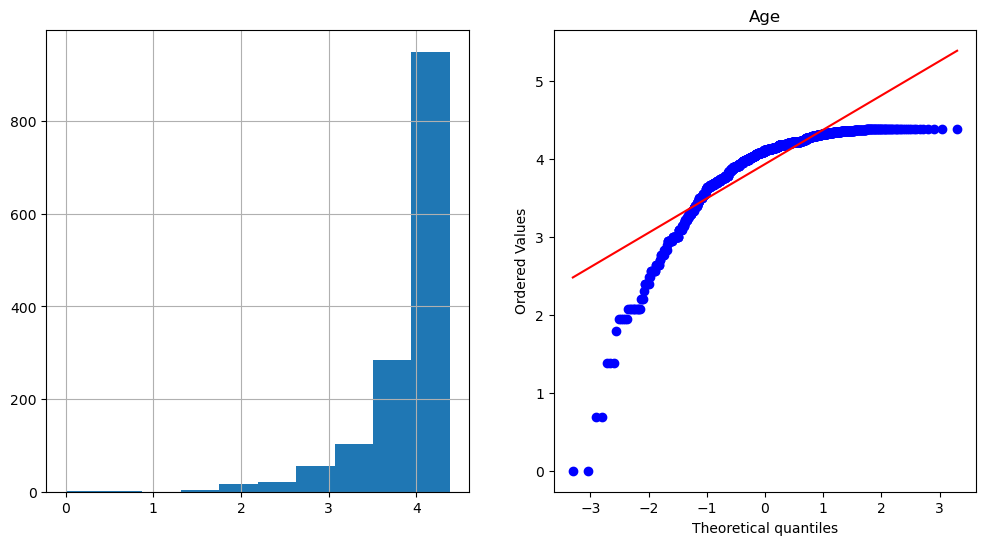

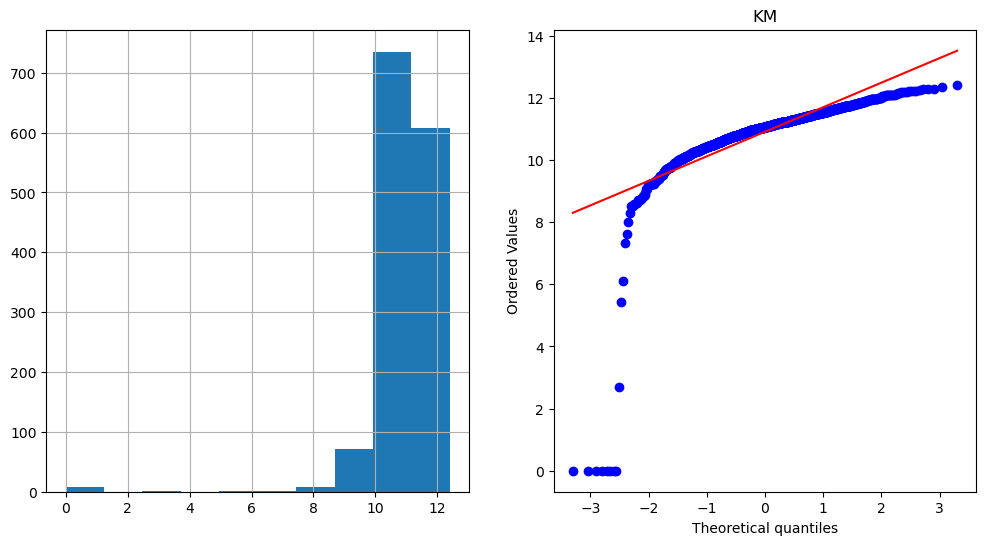

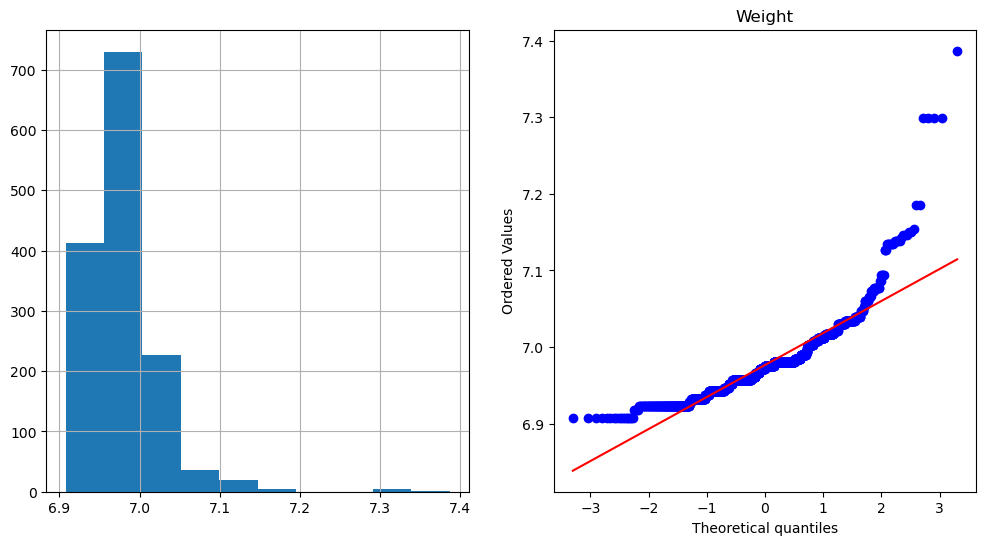

In [27]:
#Log transformation and visualizing the Histogram to determine any possible changes in distribution
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

In [28]:
#Square root transformation and visualizing the Histogram to determine any possible changes in distribution

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Weight')

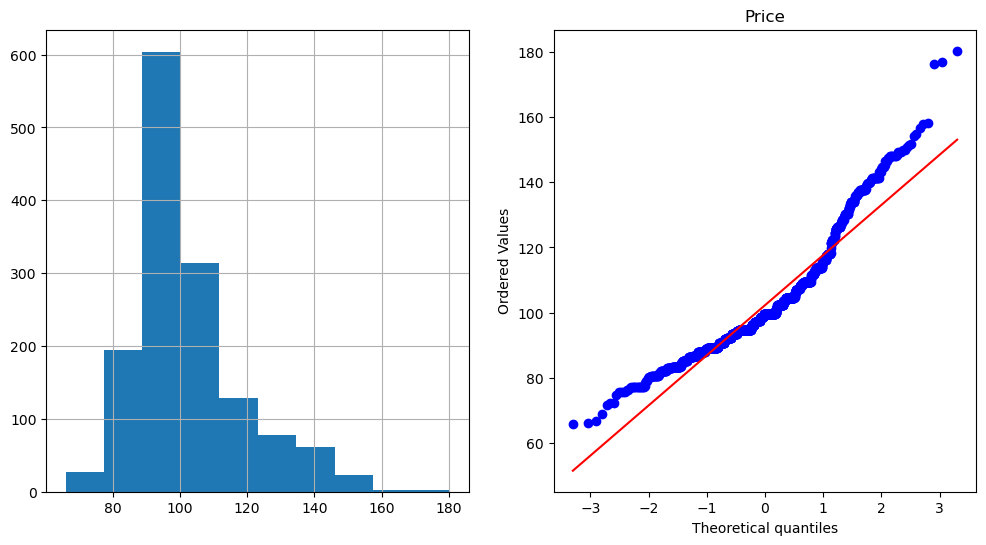

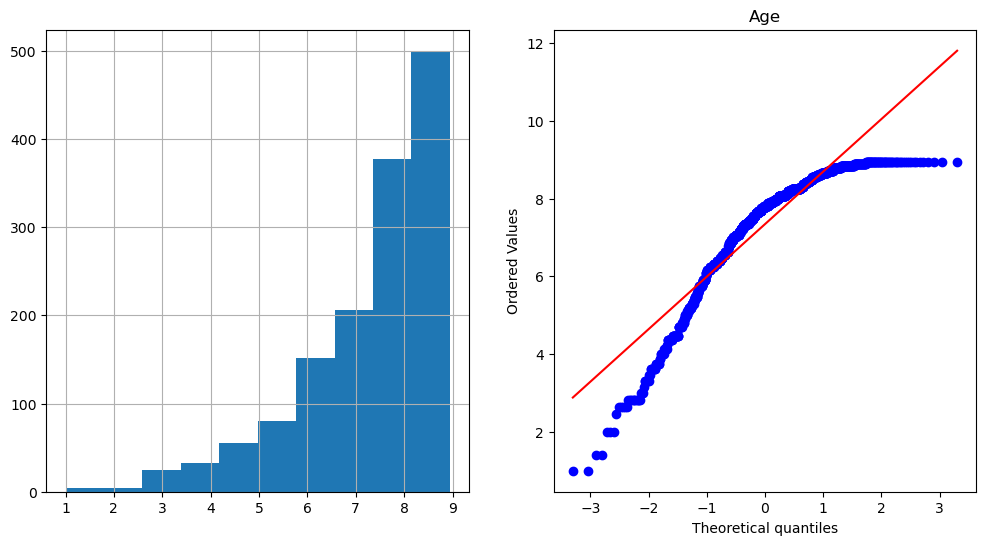

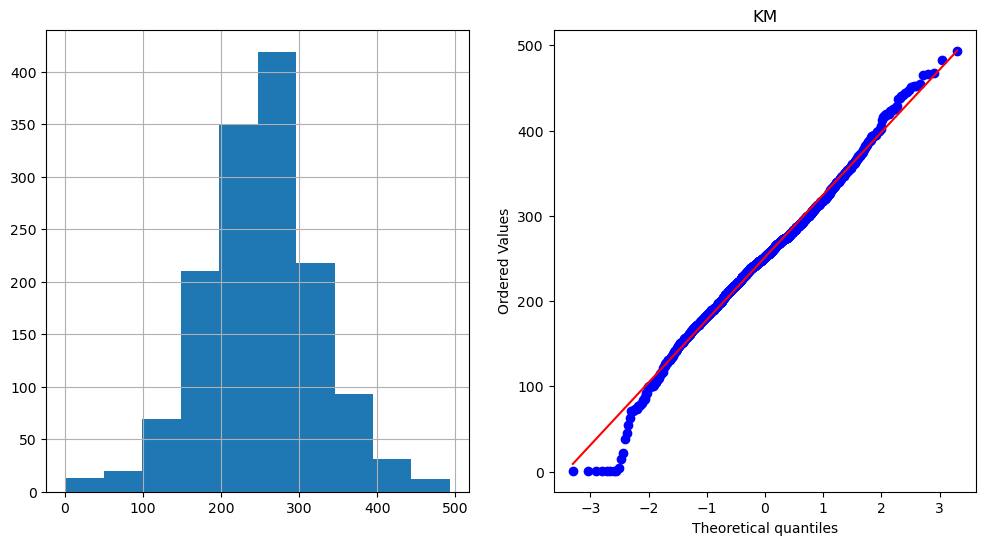

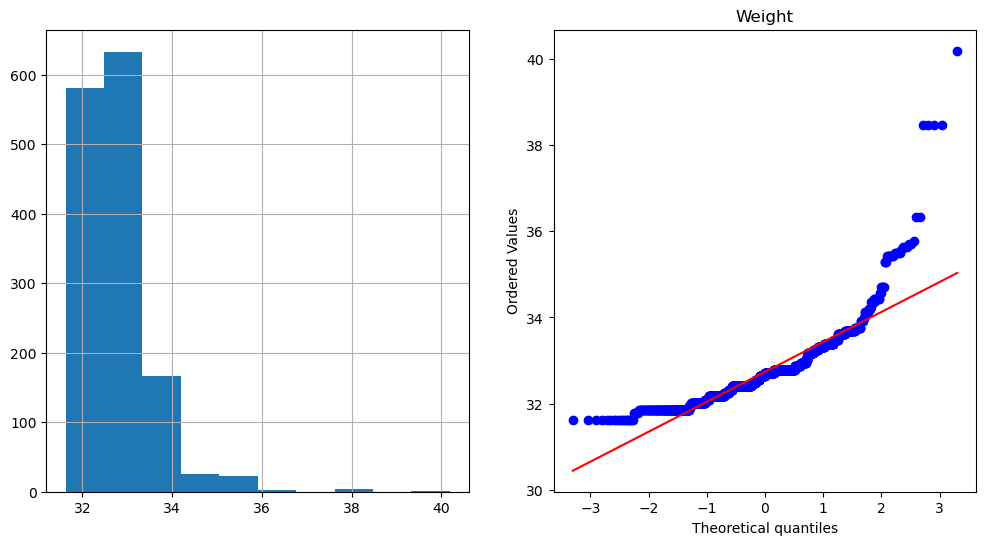

In [29]:
df=data.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Weight')

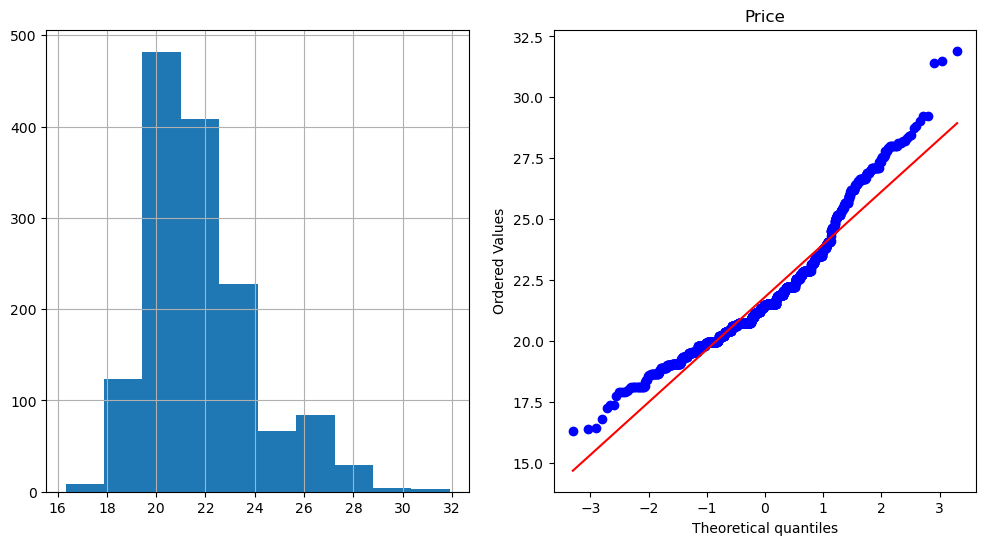

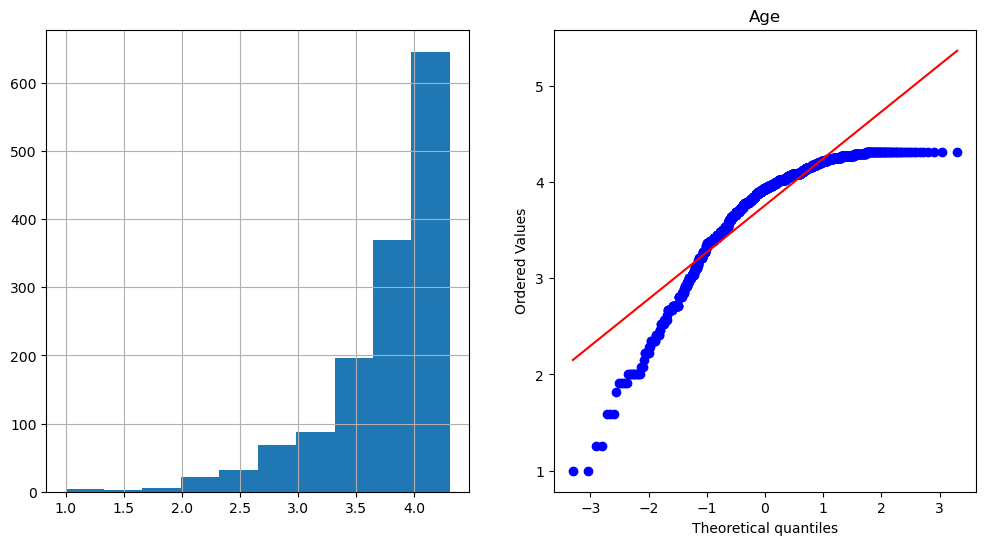

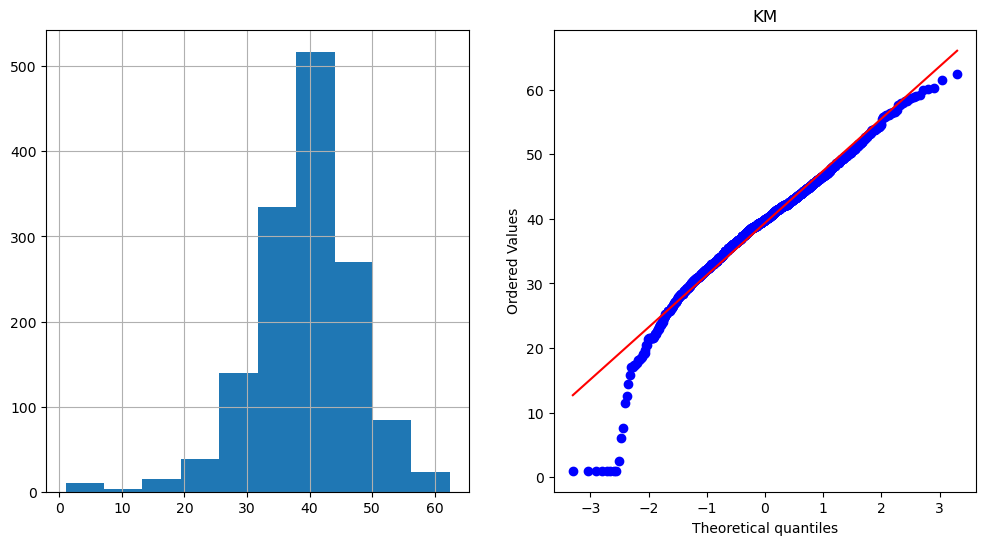

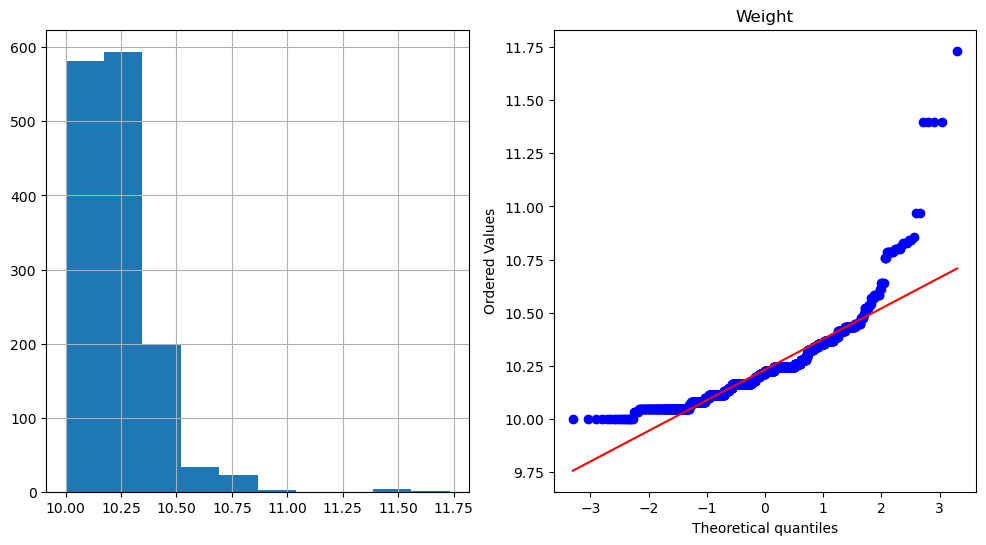

In [30]:
#Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

In [31]:
#The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [32]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('Price feature',shapiro(data.Price),'\n'
     'Age feature',shapiro(data.Age),'\n'
     'Weight feature',shapiro(data.Weight),'\n'
     'KM feature',shapiro(data.KM))

Price feature ShapiroResult(statistic=0.8534729480743408, pvalue=1.5960294063332542e-34) 
Age feature ShapiroResult(statistic=0.926694929599762, pvalue=6.738004885543532e-26) 
Weight feature ShapiroResult(statistic=0.7825542688369751, pvalue=5.042796731627146e-40) 
KM feature ShapiroResult(statistic=0.9475831389427185, pvalue=3.444094263209402e-22)


In [ ]:
Observation: Since the# p-values are less than .05, we reject the null hypothesis.

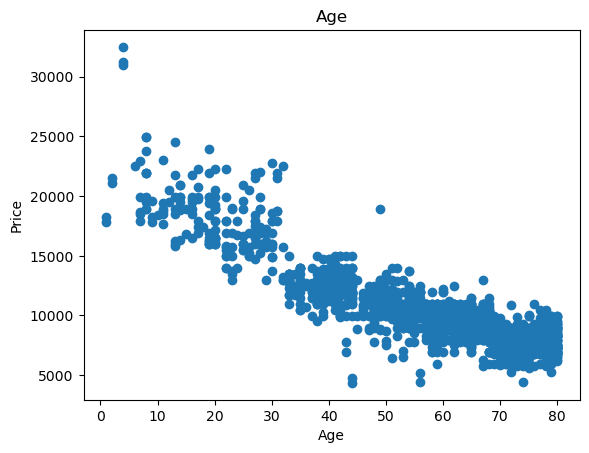

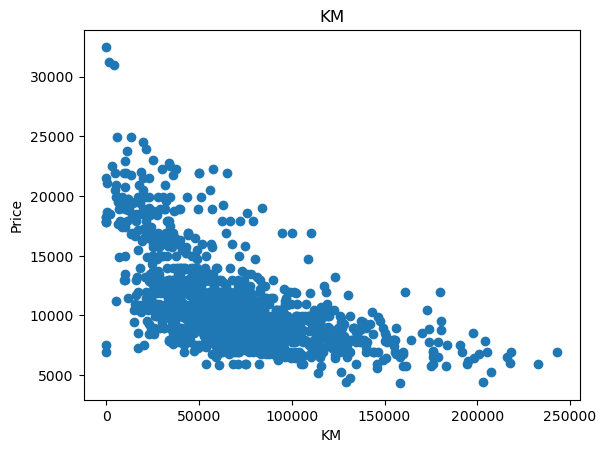

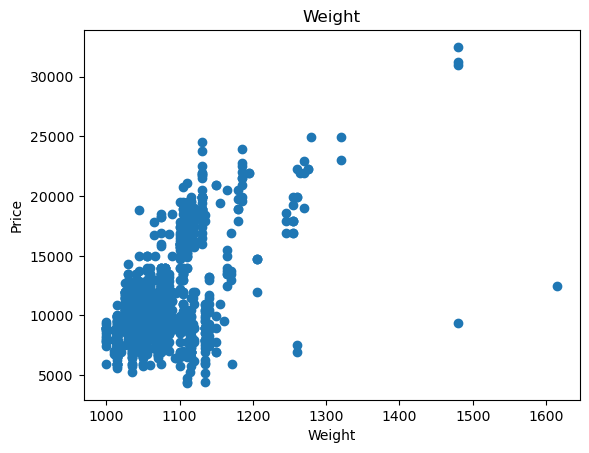

In [33]:
#Visualizing the Relation between each independent Feature with respect to the Dependent Feature
for feature in continuous_feature:
    if feature!="Price":
        df=data.copy()         
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

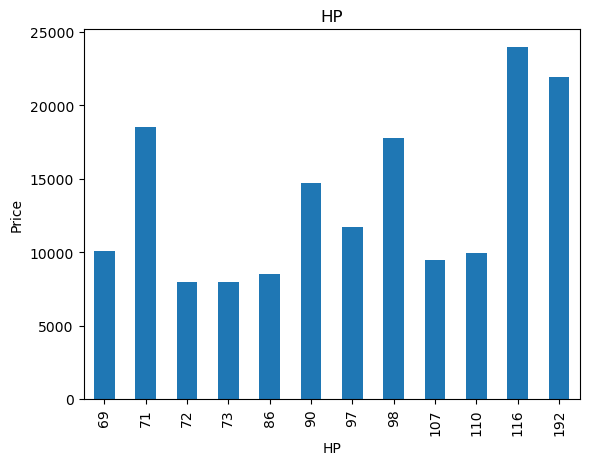

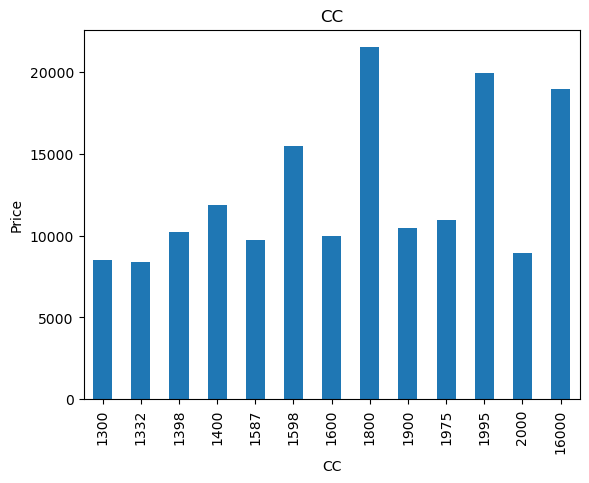

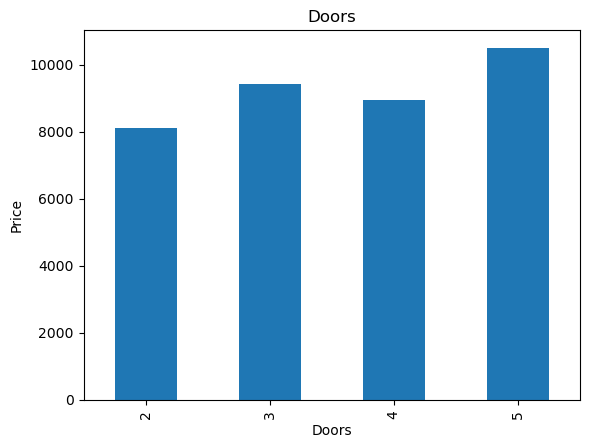

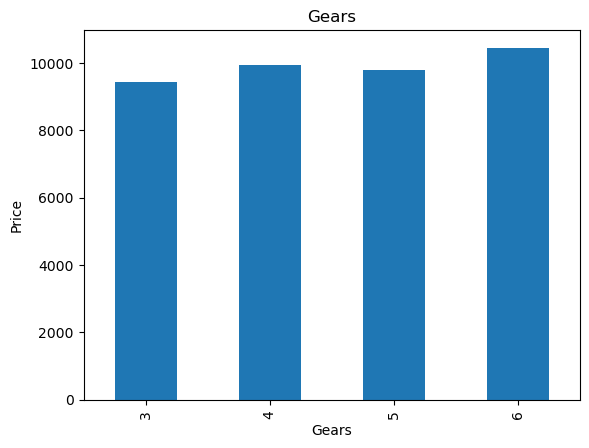

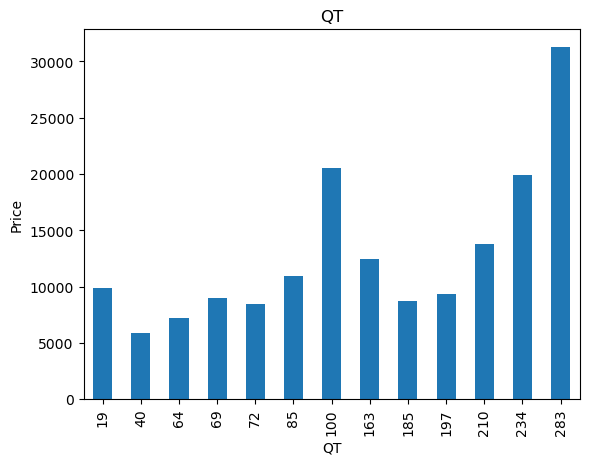

In [34]:
#Lets analyze the relationship between the discrete variables and Price

for feature in discrete_feature:
    df=data.copy()
    df.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

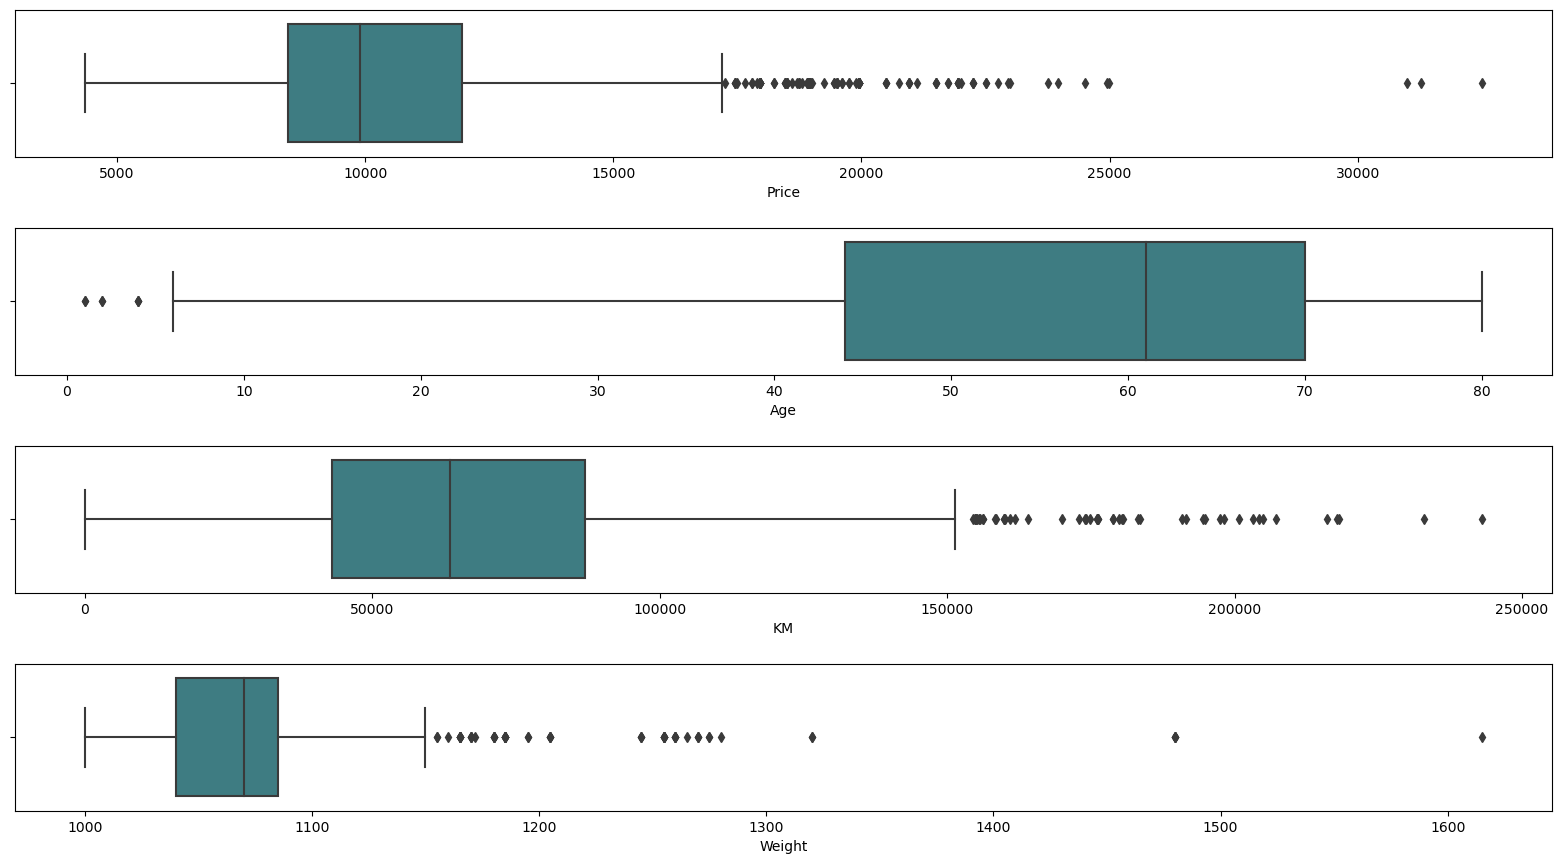

In [35]:
#Visualizing Continuous Datatype for Outlier Detection
df=data.copy() 
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

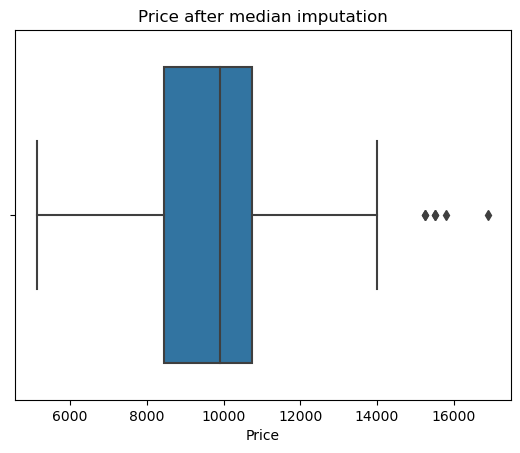

In [36]:
#Median Imputation to handle Outlier in Profit
df1=data.copy()
for i in data['Price']:
    q1 = np.quantile(df1.Price,0.25)
    q3 = np.quantile(df1.Price,0.75)
    med = np.median(df1.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Price'] = df1['Price'].replace(i, np.median(df1['Price']))
sns.boxplot(df1['Price'])
plt.title('Price after median imputation')
plt.show()

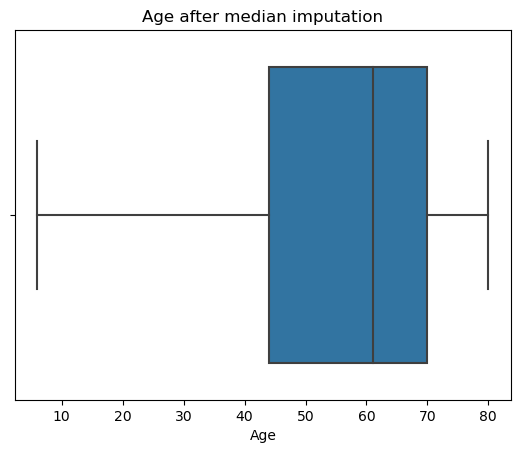

In [37]:
for i in data['Age']:
    q1 = np.quantile(df1.Age,0.25)
    q3 = np.quantile(df1.Age,0.75)
    med = np.median(df1.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Age'] = df1['Age'].replace(i, np.median(df1['Age']))
sns.boxplot(df1['Age'])
plt.title('Age after median imputation')
plt.show()


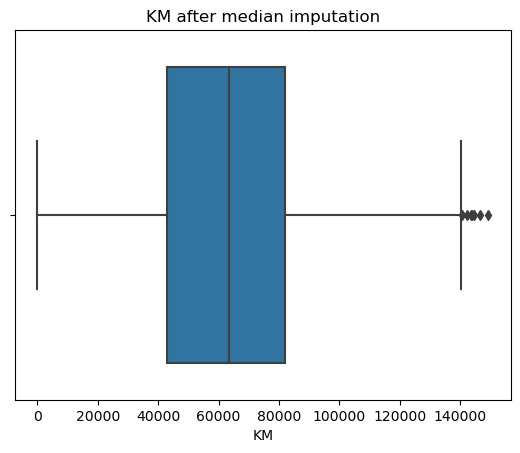

In [38]:
for i in data['KM']:
    q1 = np.quantile(df1.KM,0.25)
    q3 = np.quantile(df1.KM,0.75)
    med = np.median(df1.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['KM'] = df1['KM'].replace(i, np.median(df1['KM']))
sns.boxplot(df1['KM'])
plt.title('KM after median imputation')
plt.show()


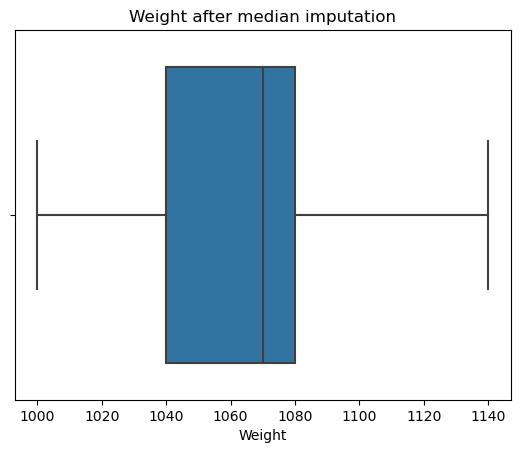

In [39]:
for i in data['Weight']:
    q1 = np.quantile(df1.Weight,0.25)
    q3 = np.quantile(df1.Weight,0.75)
    med = np.median(df1.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Weight'] = df1['Weight'].replace(i, np.median(df1['Weight']))
sns.boxplot(df1['Weight'])
plt.title('Weight after median imputation')
plt.show()

In [42]:
import statsmodels.formula.api as smf
after_median_imputation_model = smf.ols("Price~Age+KM+Weight", data = df1).fit()
# Finding rsquared values
after_median_imputation_model.rsquared , after_median_imputation_model.rsquared_adj 


(0.34204996085646155, 0.3406706106695778)

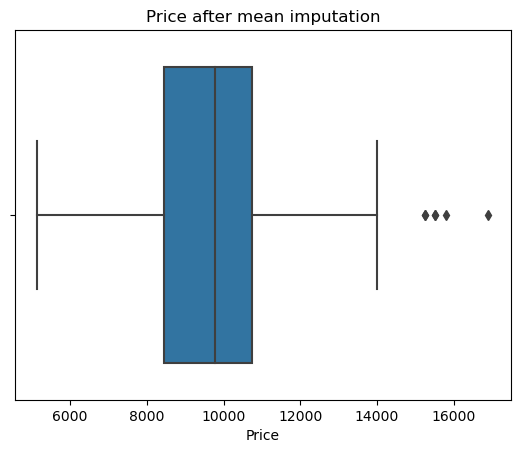

In [43]:
df2=data.copy()
for i in data['Price']:
    q1 = np.quantile(df2.Price,0.25)
    q3 = np.quantile(df2.Price,0.75)
    med = np.median(df2.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Price'] = df2['Price'].replace(i, np.mean(df2['Price']))
sns.boxplot(df2['Price'])
plt.title('Price after mean imputation')
plt.show()


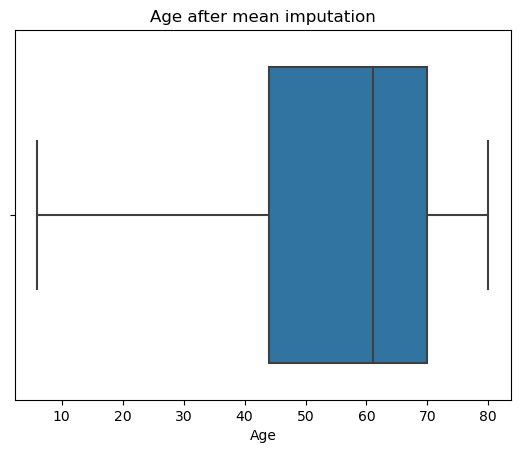

In [44]:
for i in data['Age']:
    q1 = np.quantile(df2.Age,0.25)
    q3 = np.quantile(df2.Age,0.75)
    med = np.median(df2.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Age'] = df2['Age'].replace(i, np.mean(df2['Age']))
sns.boxplot(df2['Age'])
plt.title('Age after mean imputation')
plt.show()


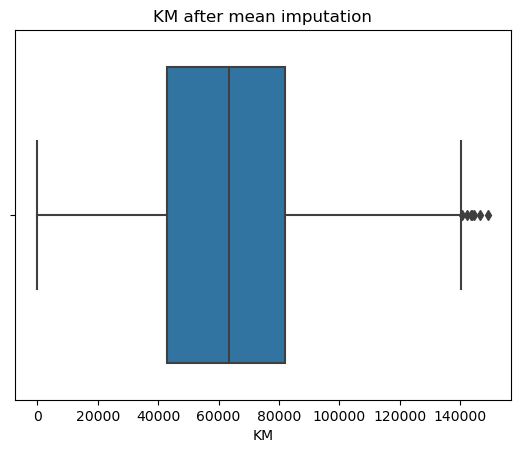

In [45]:
for i in data['KM']:
    q1 = np.quantile(df2.KM,0.25)
    q3 = np.quantile(df2.KM,0.75)
    med = np.median(df2.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['KM'] = df2['KM'].replace(i, np.mean(df2['KM']))
sns.boxplot(df2['KM'])
plt.title('KM after mean imputation')
plt.show()

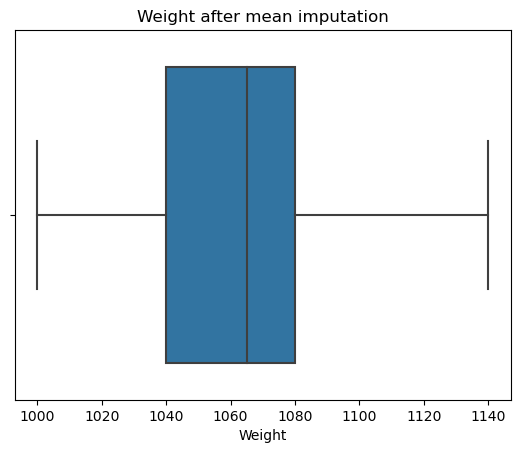

In [46]:
for i in data['Weight']:
    q1 = np.quantile(df2.Weight,0.25)
    q3 = np.quantile(df2.Weight,0.75)
    med = np.median(df2.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Weight'] = df2['Weight'].replace(i, np.mean(df2['Weight']))
sns.boxplot(df2['Weight'])
plt.title('Weight after mean imputation')
plt.show()


In [47]:
after_mean_imputation_model = smf.ols("Price~Age+KM+Weight", data = df2).fit()
# Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj


(0.3879621958171299, 0.3866790976951533)

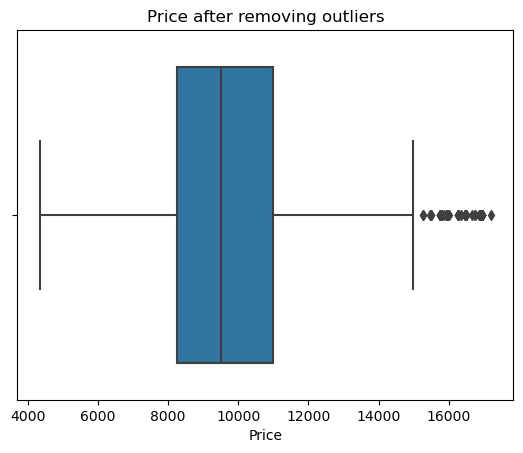

In [48]:
df3=data.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df3, 'Price')
sns.boxplot(df3.Price)
plt.title('Price after removing outliers');

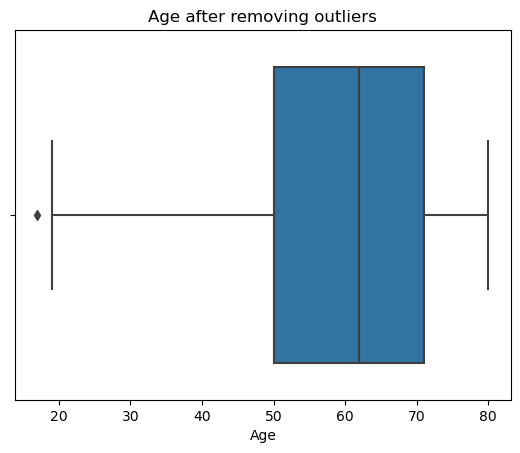

In [49]:
drop_outliers(df3, 'Age')
sns.boxplot(df3.Age)
plt.title('Age after removing outliers');

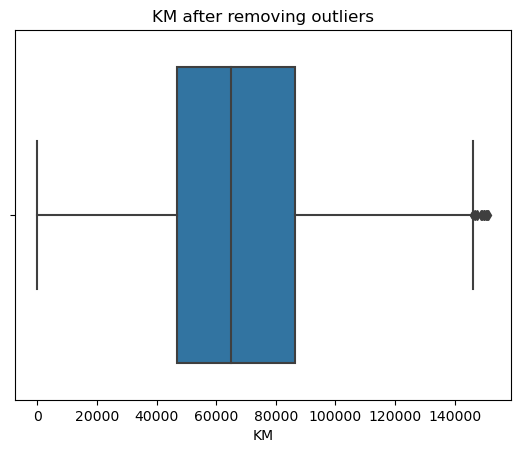

In [50]:
drop_outliers(df3, 'KM')
sns.boxplot(df3.KM)
plt.title('KM after removing outliers');

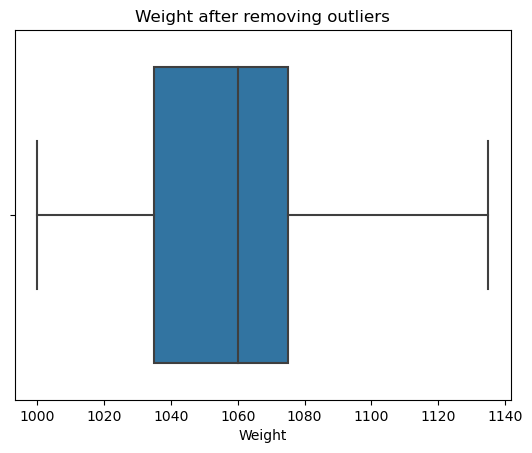

In [51]:
drop_outliers(df3, 'Weight')
sns.boxplot(df3.Weight)
plt.title('Weight after removing outliers');

In [52]:
#Let's test our data in model and compare the R-squared with without imputation data model
removed_outlier_model = smf.ols("Price~Age+KM+Weight", data = df3).fit()
# Finding rsquared values
removed_outlier_model.rsquared , removed_outlier_model.rsquared_adj


(0.7776886294411589, 0.7771455234870249)

In [53]:
np.sqrt(removed_outlier_model.mse_resid)

1060.0301342603996

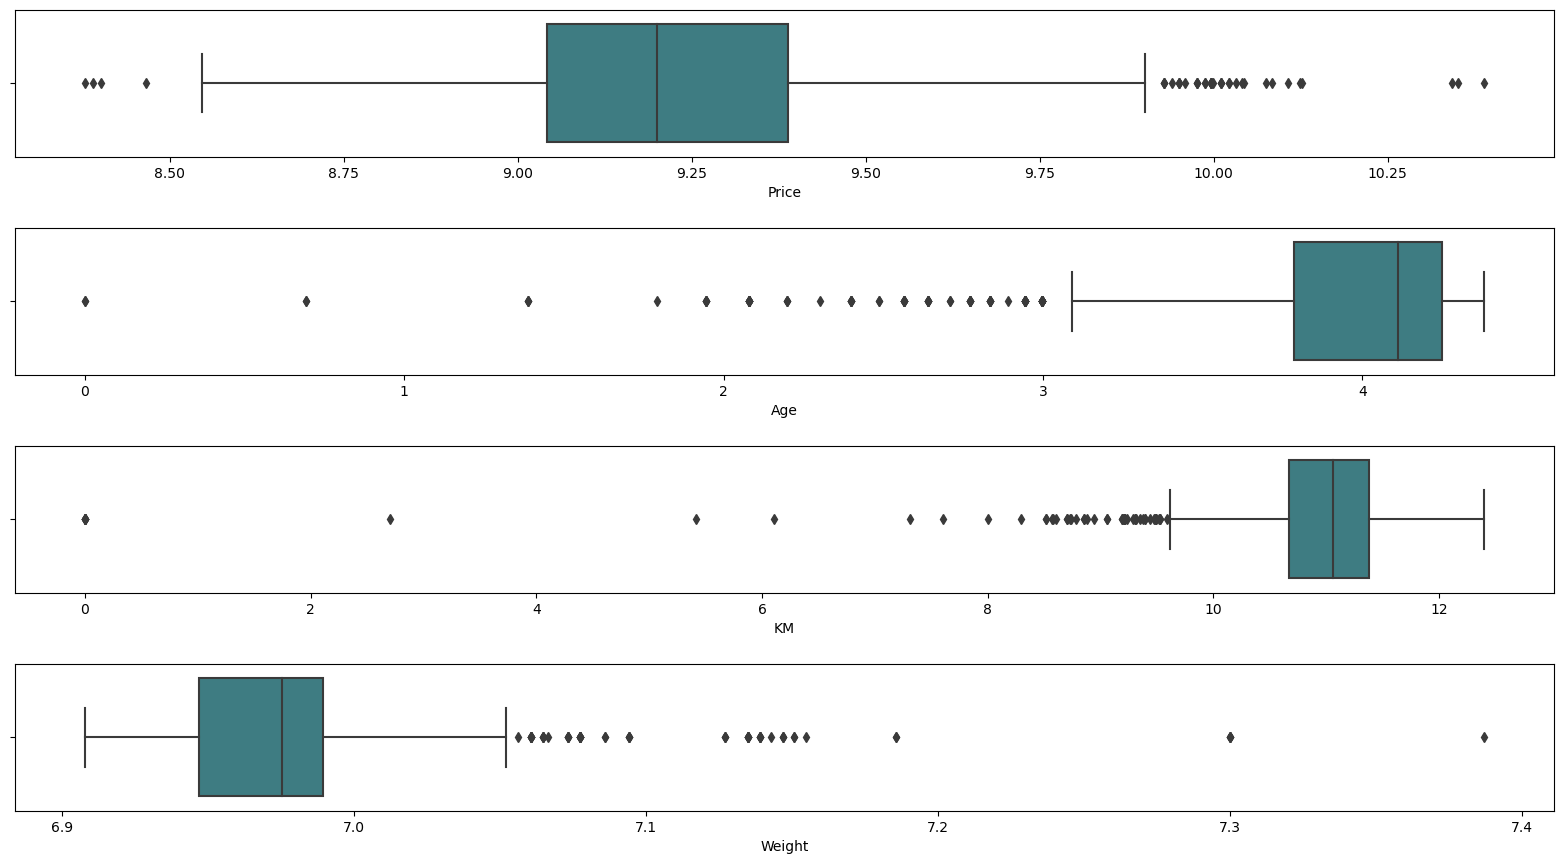

In [54]:
#log transformation and visualize the result first
df=data.copy()
df[continuous_feature]=np.log(df[continuous_feature])
    
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)


In [56]:
log_transfomed = data.copy()
log_transfomed[continuous_feature]=np.log(log_transfomed[continuous_feature])
log_transformed_model = smf.ols("Price~Age+KM+Weight", data = log_transfomed).fit()
# Finding rsquared values
log_transformed_model.rsquared , log_transformed_model.rsquared_adj


(0.7069873404282616, 0.7063730581230798)

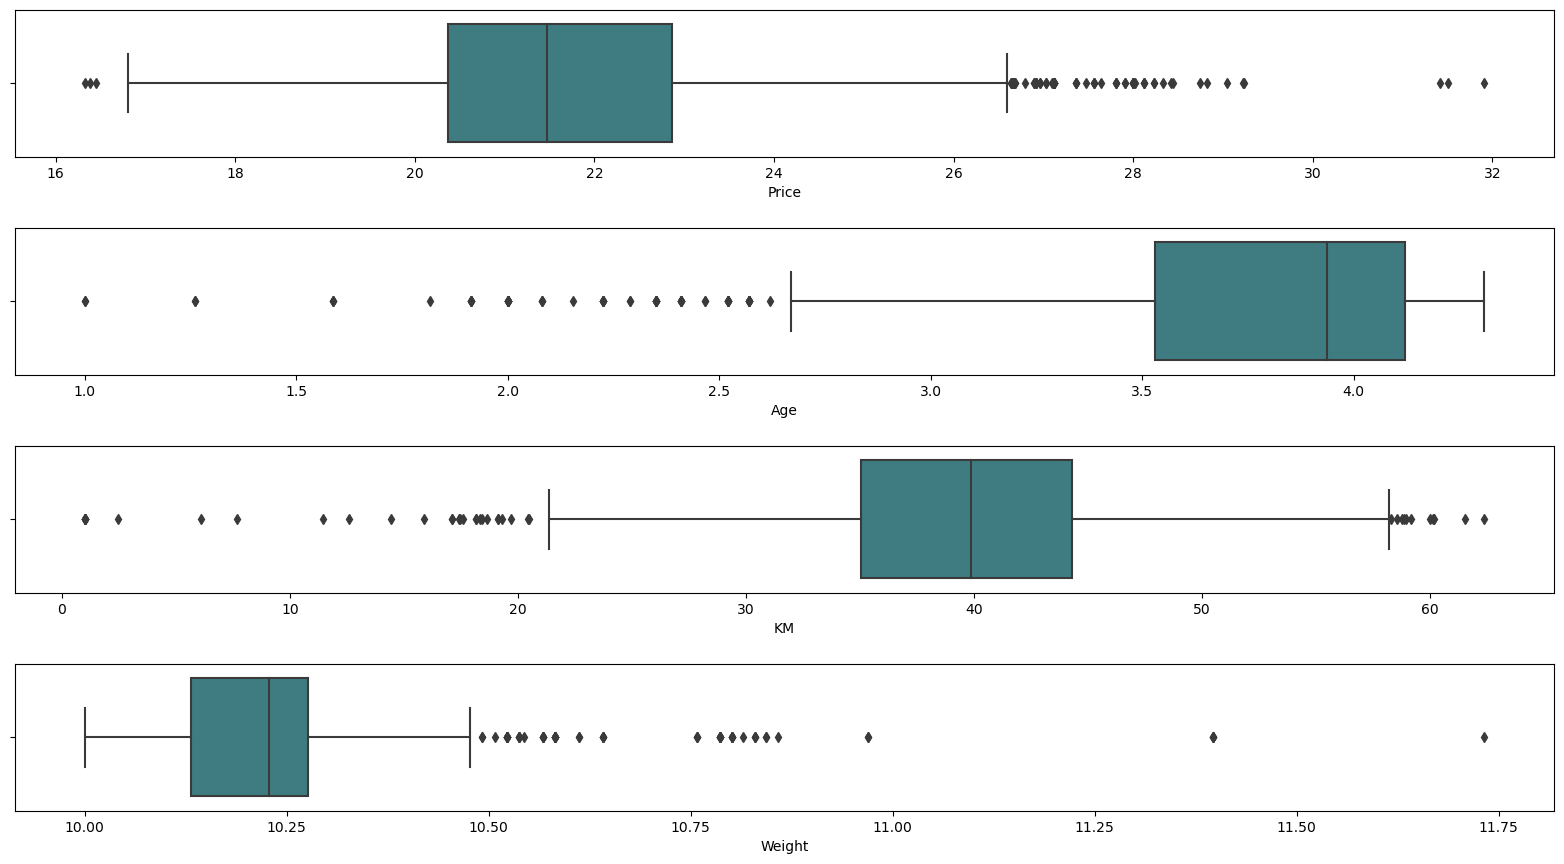

In [57]:
df=data.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [58]:
cube_root_transfomed = data.copy()
cube_root_transfomed[continuous_feature]=np.cbrt(cube_root_transfomed[continuous_feature])
cube_root_transformed_model = smf.ols("Price~Age+KM+Weight", data = cube_root_transfomed).fit()
# Finding rsquared values
cube_root_transformed_model.rsquared , cube_root_transformed_model.rsquared_adj 


(0.8146046800585908, 0.8142160106247514)

In [59]:
#Raw Data Model
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [60]:
raw_data_model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears+QT+Doors", data = data).fit()
# Finding rsquared values
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:36:40   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
np.sqrt(raw_data_model.mse_resid)

1341.804618693868

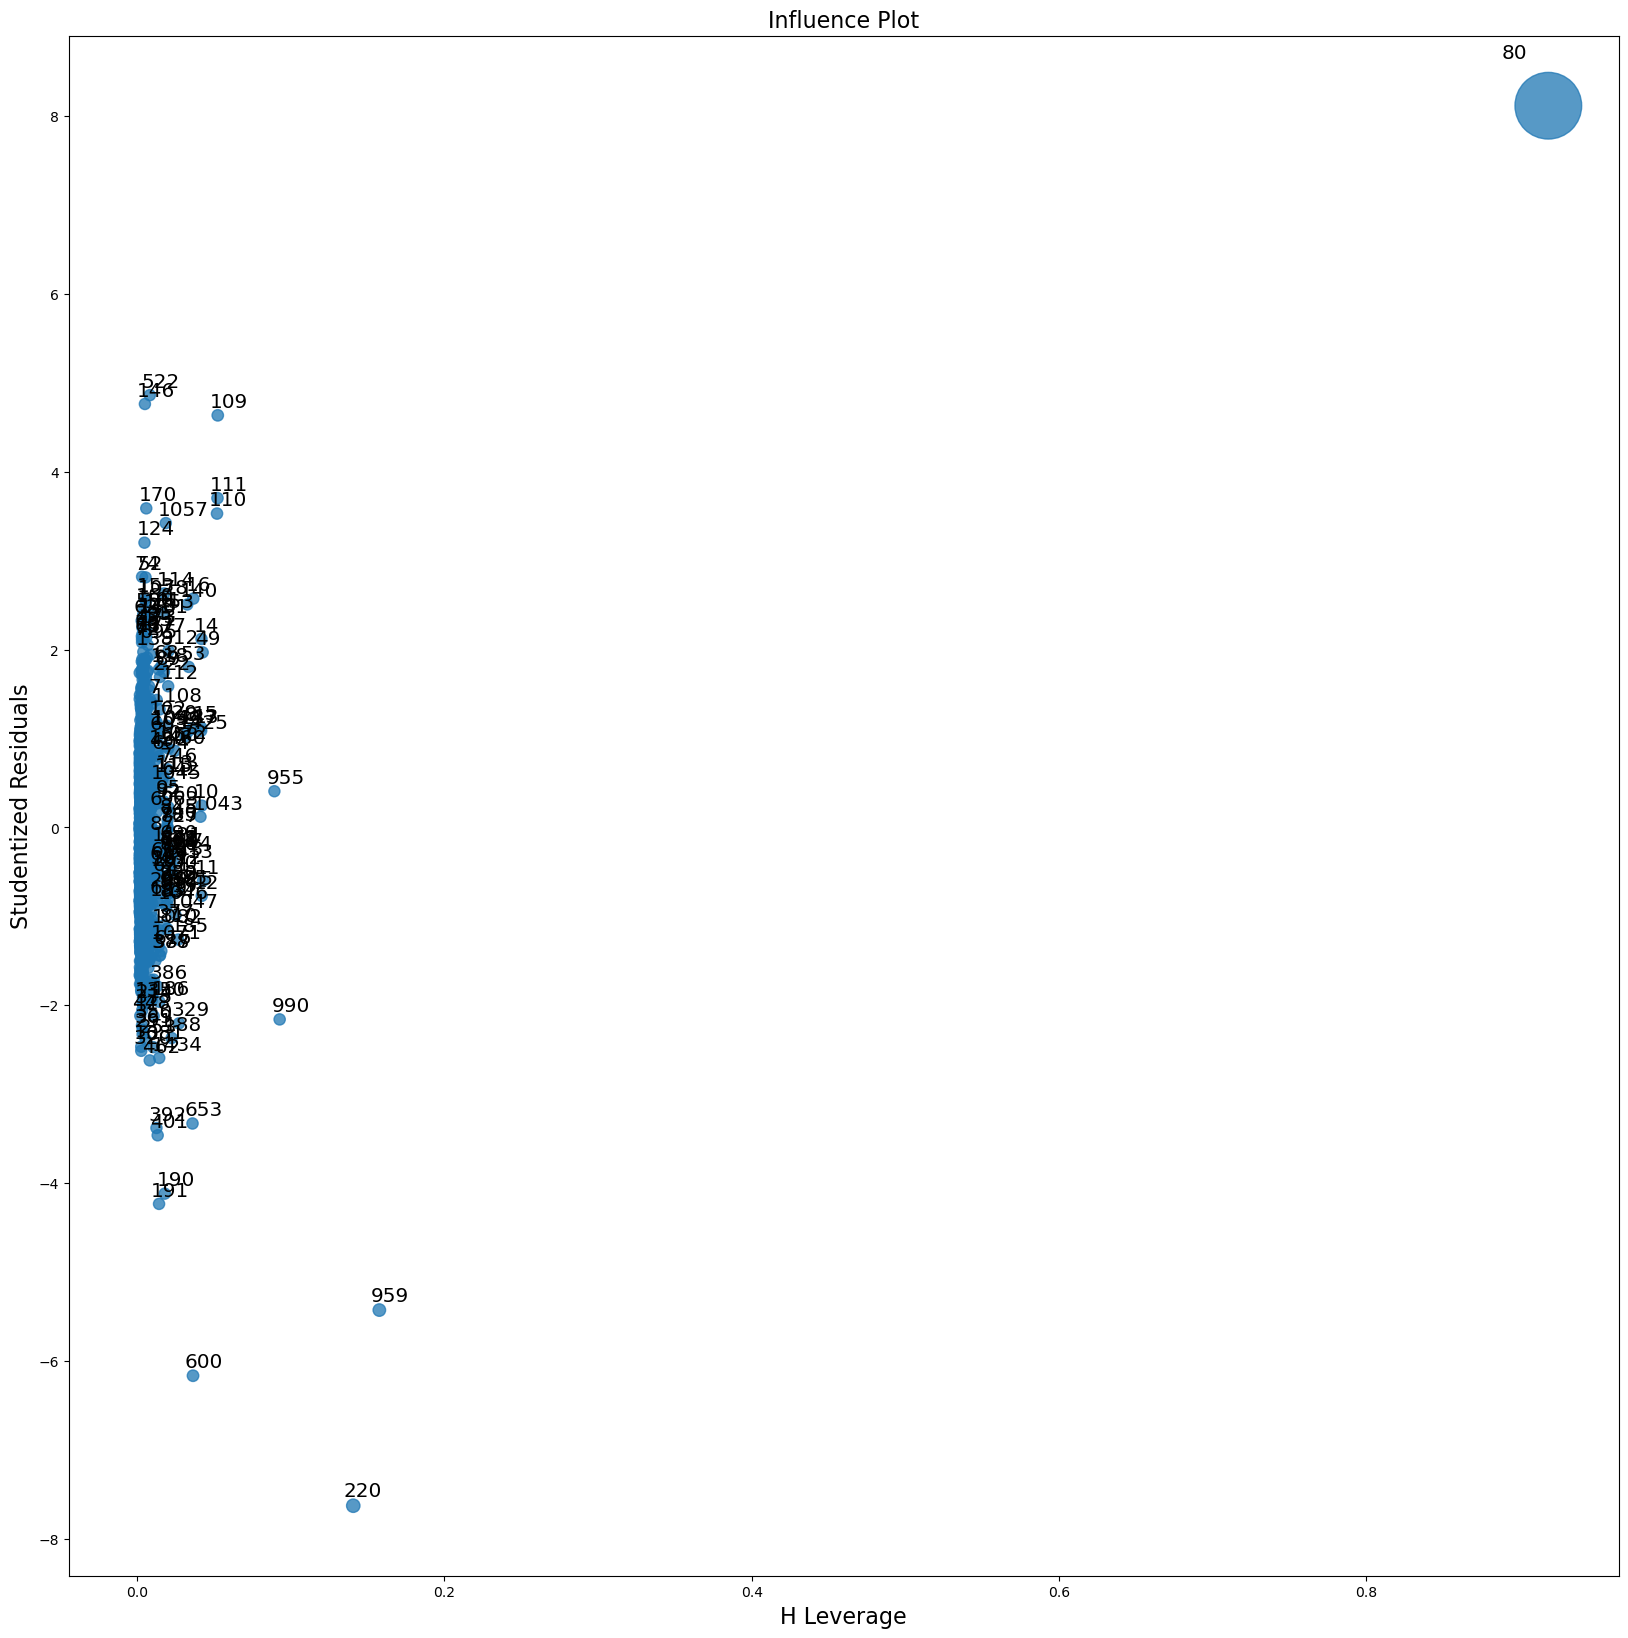

In [63]:
#Detecting Influencers/Outliers in the Model
influence_points=raw_data_model.get_influence()
c, p_value=influence_points.cooks_distance
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(raw_data_model,ax = ax)
plt.show()

In [64]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.02


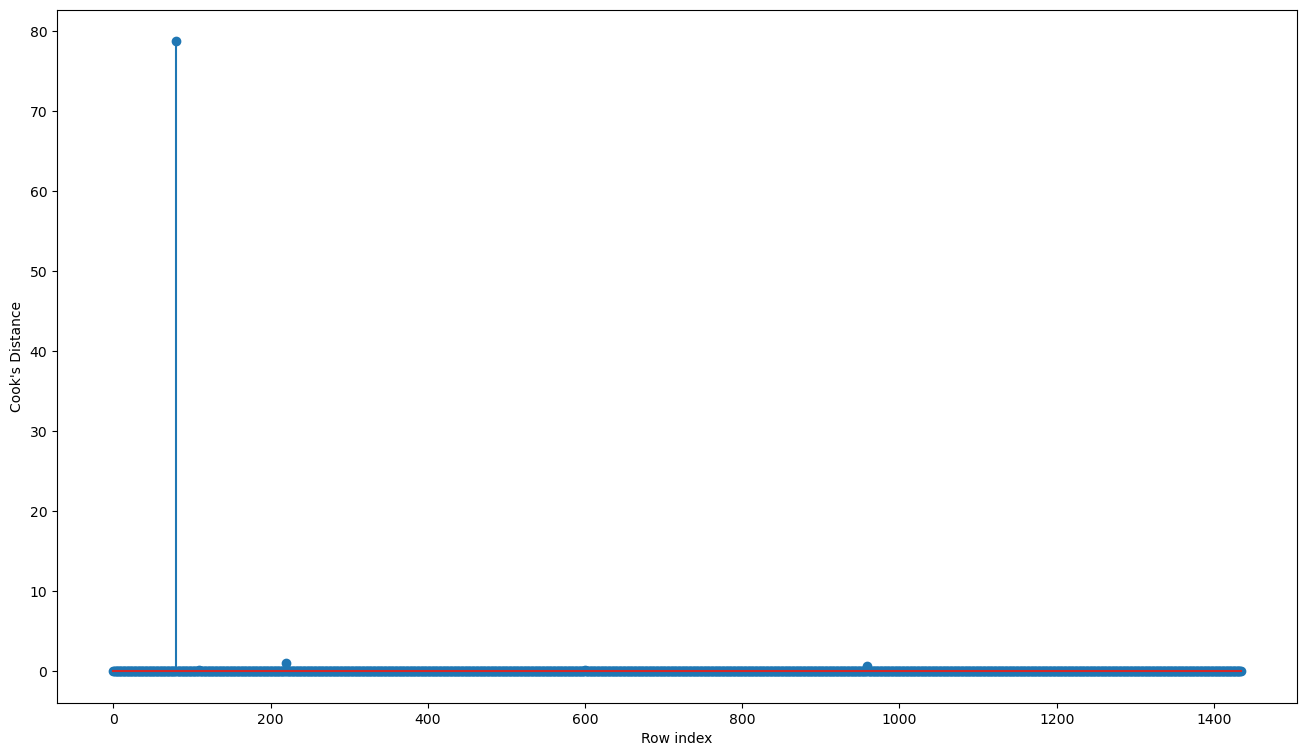

In [65]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [66]:
np.argmax(c) , np.max(c)

(80, 78.7295058225186)

In [67]:
np.argmax(c) , np.max(c)

(80, 78.7295058225186)

In [68]:
dataframe= data.copy()
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
dataframe=dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [69]:
data.shape

(1435, 9)

In [70]:
#Model Deletion Diagnostics and Final Model
# Another Method
"""k=dataframe.shape[1]
n=dataframe.shape[0]
leverage_cutoff = (3*(k+1))/n
while np.max(c)>leverage_cutoff:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    dataframe
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)"""


'k=dataframe.shape[1]\nn=dataframe.shape[0]\nleverage_cutoff = (3*(k+1))/n\nwhile np.max(c)>leverage_cutoff:\n    model=smf.ols(\'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight\',data=dataframe).fit()\n    (c,_)=model.get_influence().cooks_distance\n    c\n    np.argmax(c) , np.max(c)\n    dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)\n    dataframe\nelse:\n    final_model=smf.ols(\'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight\',data=dataframe).fit()\n    final_model.rsquared , final_model.aic\n    print("Thus model accuracy is improved to",final_model.rsquared)'

In [71]:
while raw_data_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        raw_data_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
        (c,_)=raw_data_model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataframe
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)


Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741537
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147553
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [72]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

In [73]:
dataframe.shape

(1330, 9)

In [74]:
dataframe.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245


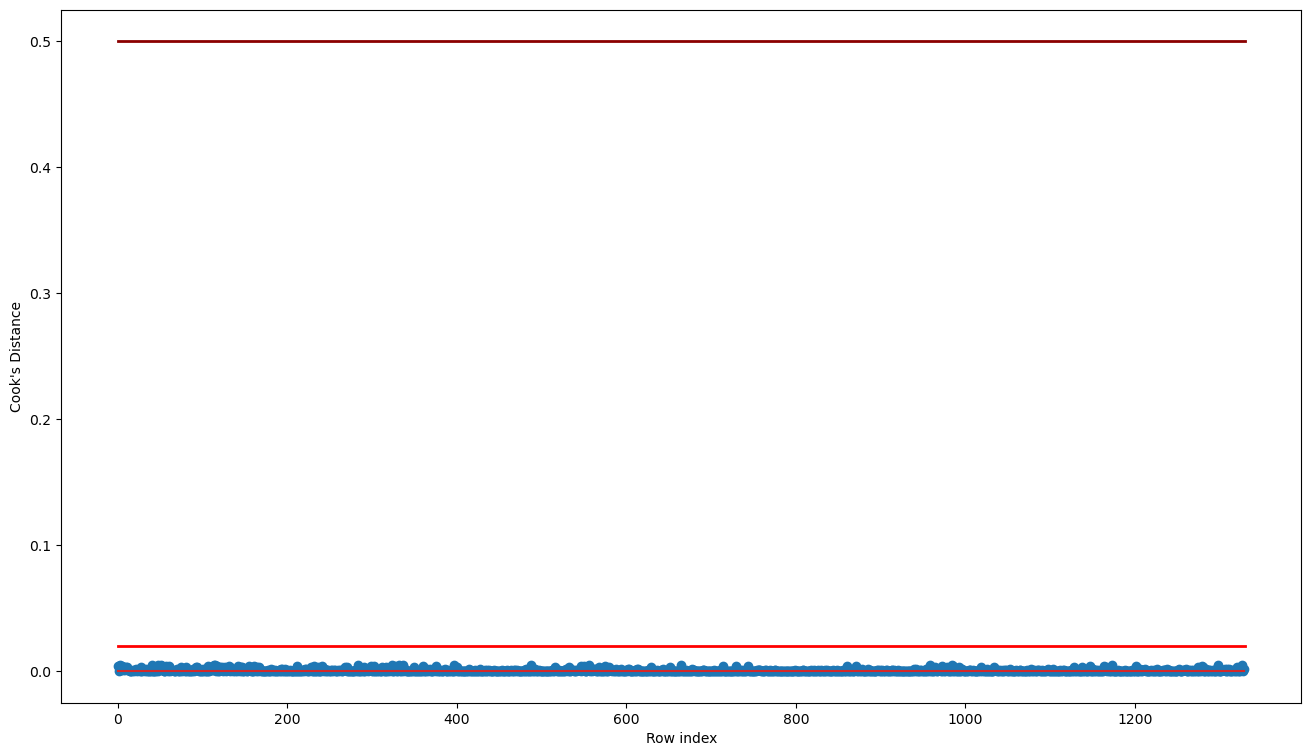

In [75]:
fig = plt.figure(figsize = (16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(dataframe)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [76]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:43:46   Log-Likelihood:                -11038.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1321   BIC:                         2.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.864e+04   1513.105    -12.316      0.000   -2.16e+04   -1.57e+04
Age         -108.2573      2.181    -49.648      0.000    -112.535    -103.980
KM            -0.0155      0.001    -14.830      0.000      -0.018      -0.013
HP             7.8533      3.037      2.586      0.010       1.895      13.812
CC            -2.2731      0.291     -7.799      0.000      -2.845      -1.701
Doors       -149.1873     32.432     -4.600      0.000    -212.811     -85.563
Gears        251.4363    163.559      1.537      0.124     -69.428     572.301
QT           -11.6187      1.626     -7.144      0.000     -14.809      -8.428
Weight        36.9768      1.446     25.566      0.000      34.139      39.814
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
np.sqrt(final_model.mse_resid)

975.9271399262797

In [78]:
#Log-Transformation
df_log_scaled = pd.DataFrame()
df_log_scaled['Age'] = np.log(dataframe.Age)
df_log_scaled['Price'] = np.log(dataframe.Price)
df_log_scaled['KM'] = np.log(dataframe.KM)
df_log_scaled['Weight'] = np.log(dataframe.Weight)
df_log_scaled['CC'] = dataframe['CC']
df_log_scaled['Doors'] = dataframe['Doors']
df_log_scaled['HP'] = dataframe['HP']
df_log_scaled.head()

,Age,Price,KM,Weight,CC,Doors,HP
0,3.135494,9.528794,11.197351,7.060476,2000,3,90
1,3.258097,9.612467,10.778956,7.060476,2000,3,90
2,3.401197,9.528794,10.558414,7.064759,2000,3,90
3,3.465736,9.468851,11.018629,7.064759,2000,3,90
4,3.295837,9.735069,11.457540,7.126891,2000,3,90


In [79]:
log_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Weight", data = df_log_scaled).fit()
# Finding rsquared values for Log transformation
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     729.6
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:45:26   Log-Likelihood:                 843.01
No. Observations:                1330   AIC:                            -1672.
Df Residuals:                    1323   BIC:                            -1636.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3980      1.353     -3.991      0.000      -8.052      -2.745
Age           -0.4079      0.013    -30.586      0.000      -0.434      -0.382
KM             0.0034      0.006      0.594      0.552      -0.008       0.015
HP             0.0032      0.000     11.096      0.000       0.003       0.004
CC            -0.0003   3.33e-05     -8.494      0.000      -0.000      -0.000
Doors         -0.0039      0.004     -0.927      0.354      -0.012       0.004
Weight         2.3427      0.197     11.867      0.000       1.955       2.730
==============================================================================
Omnibus:                      284.802   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1143.768
Skew:                          -0.976   Prob(JB):                    4.31e-249
Kurtosis:                       7.103   Cond. No.                     6.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
#Cube-Root Transformation
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Age'] = np.cbrt(dataframe.Age)
df_cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
df_cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
df_cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
df_cbrt_scaled['CC'] = dataframe['CC']
df_cbrt_scaled['QT'] = dataframe['QT']
df_cbrt_scaled['Doors'] = dataframe['Doors']
df_cbrt_scaled['Gears'] = dataframe['Gears']
df_cbrt_scaled['HP'] = dataframe['HP']
df_cbrt_scaled.head()


,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,2.843867,23.957099,41.781366,10.522251,2000,210,3,5,90
1,2.962496,24.634688,36.342412,10.522251,2000,210,3,5,90
2,3.107233,23.957099,33.766567,10.537282,2000,210,3,5,90
3,3.174802,23.483163,39.364972,10.537282,2000,210,3,5,90
4,3.000000,25.662299,45.566822,10.757791,2000,210,3,5,90


In [81]:
cbrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_cbrt_scaled).fit()
# Finding rsquared values for Cube-Root transformation
cbrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     991.6
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:46:15   Log-Likelihood:                -1505.8
No. Observations:                1330   AIC:                             3030.
Df Residuals:                    1321   BIC:                             3076.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.5991      3.723     -4.996      0.000     -25.902     -11.296
Age           -2.5835      0.069    -37.297      0.000      -2.719      -2.448
KM            -0.0450      0.004    -11.317      0.000      -0.053      -0.037
HP             0.0139      0.002      6.029      0.000       0.009       0.018
CC            -0.0013      0.000     -5.690      0.000      -0.002      -0.001
Doors         -0.0179      0.025     -0.707      0.480      -0.067       0.032
Gears          0.2967      0.126      2.350      0.019       0.049       0.544
QT            -0.0016      0.001     -1.232      0.218      -0.004       0.001
Weight         5.0086      0.375     13.353      0.000       4.273       5.744
==============================================================================
Omnibus:                       83.976   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.525
Skew:                          -0.447   Prob(JB):                     2.79e-34
Kurtosis:                       4.410   Cond. No.                     2.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
#Square-Root Transformation
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age'] = np.sqrt(dataframe.Age)
df_sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
df_sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
df_sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
df_sqrt_scaled['CC'] = dataframe['CC']
df_sqrt_scaled['QT'] = dataframe['QT']
df_sqrt_scaled['Doors'] = dataframe['Doors']
df_sqrt_scaled['Gears'] = dataframe['Gears']
df_sqrt_scaled['HP'] = dataframe['HP']
df_sqrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,4.795832,117.260394,270.068510,34.132096,2000,210,3,5,90
1,5.099020,122.270193,219.089023,34.132096,2000,210,3,5,90
2,5.477226,117.260394,196.214169,34.205263,2000,210,3,5,90
3,5.656854,113.798067,246.981781,34.205263,2000,210,3,5,90
4,5.196152,130.000000,307.590637,35.284558,2000,210,3,5,90


In [83]:
sqrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_sqrt_scaled).fit()
# Finding rsquared values for Square-Root transformation
sqrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1229.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:46:47   Log-Likelihood:                -3993.0
No. Observations:                1330   AIC:                             8004.
Df Residuals:                    1321   BIC:                             8051.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -100.7308     15.607     -6.454      0.000    -131.348     -70.114
Age           -6.7197      0.157    -42.795      0.000      -7.028      -6.412
KM            -0.0384      0.003    -13.802      0.000      -0.044      -0.033
HP             0.0766      0.015      5.084      0.000       0.047       0.106
CC            -0.0082      0.001     -5.622      0.000      -0.011      -0.005
Doors         -0.2049      0.164     -1.251      0.211      -0.526       0.116
Gears          2.0321      0.819      2.481      0.013       0.425       3.639
QT            -0.0209      0.008     -2.563      0.010      -0.037      -0.005
Weight         7.9388      0.500     15.875      0.000       6.958       8.920
==============================================================================
Omnibus:                        7.852   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                8.528
Skew:                          -0.128   Prob(JB):                       0.0141
Kurtosis:                       3.297   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
df_robust_scaled = dataframe.copy()
columns= ['Price','Age','KM','Weight']
features = df_robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_robust_scaled[columns] = scaler.fit_transform(features.values)
df_robust_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.175000,-1.583333,0.211503,90,2000,3,5,210,2.222222
1,1.538636,-1.458333,-0.375961,90,2000,3,5,210,2.222222
2,1.175000,-1.291667,-0.599762,90,2000,3,5,210,2.333333
3,0.932576,-1.208333,-0.069708,90,2000,3,5,210,2.333333
4,2.129545,-1.416667,0.722122,90,2000,3,5,210,4.000000


In [85]:
robust_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_robust_scaled).fit()
# Finding rsquared values for robust transformation
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:50:47   Log-Likelihood:                -262.35
No. Observations:                1330   AIC:                             542.7
Df Residuals:                    1321   BIC:                             589.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9936      0.285      3.487      0.001       0.435       1.553
Age           -0.7873      0.016    -49.648      0.000      -0.818      -0.756
KM            -0.1989      0.013    -14.830      0.000      -0.225      -0.173
HP             0.0024      0.001      2.586      0.010       0.001       0.004
CC            -0.0007   8.83e-05     -7.799      0.000      -0.001      -0.001
Doors         -0.0452      0.010     -4.600      0.000      -0.064      -0.026
Gears          0.0762      0.050      1.537      0.124      -0.021       0.173
QT            -0.0035      0.000     -7.144      0.000      -0.004      -0.003
Weight         0.5042      0.020     25.566      0.000       0.466       0.543
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     5.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
from sklearn.preprocessing import StandardScaler

col_names = dataframe.columns
features = dataframe[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.057454,-1.915503,0.136289,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
1,1.446875,-1.746462,-0.576515,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
2,1.057454,-1.521074,-0.848065,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
3,0.797839,-1.408380,-0.204921,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
4,2.079684,-1.690115,0.755851,-0.883769,2.526466,-1.067888,-0.137393,3.424789,4.441570


In [87]:
standard_scaler_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:51:12   Log-Likelihood:                -353.46
No. Observations:                1330   AIC:                             724.9
Df Residuals:                    1321   BIC:                             771.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e-17      0.009   1.65e-15      1.000      -0.017       0.017
Age           -0.6235      0.013    -49.648      0.000      -0.648      -0.599
KM            -0.1756      0.012    -14.830      0.000      -0.199      -0.152
HP             0.0325      0.013      2.586      0.010       0.008       0.057
CC            -0.1307      0.017     -7.799      0.000      -0.164      -0.098
Doors         -0.0462      0.010     -4.600      0.000      -0.066      -0.026
Gears          0.0138      0.009      1.537      0.124      -0.004       0.032
QT            -0.1368      0.019     -7.144      0.000      -0.174      -0.099
Weight         0.4836      0.019     25.566      0.000       0.446       0.521
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:51:29   Log-Likelihood:                -353.46
No. Observations:                1330   AIC:                             724.9
Df Residuals:                    1321   BIC:                             771.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e-17      0.009   1.65e-15      1.000      -0.017       0.017
Age           -0.6235      0.013    -49.648      0.000      -0.648      -0.599
KM            -0.1756      0.012    -14.830      0.000      -0.199      -0.152
HP             0.0325      0.013      2.586      0.010       0.008       0.057
CC            -0.1307      0.017     -7.799      0.000      -0.164      -0.098
Doors         -0.0462      0.010     -4.600      0.000      -0.066      -0.026
Gears          0.0138      0.009      1.537      0.124      -0.004       0.032
QT            -0.1368      0.019     -7.144      0.000      -0.174      -0.099
Weight         0.4836      0.019     25.566      0.000       0.446       0.521
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


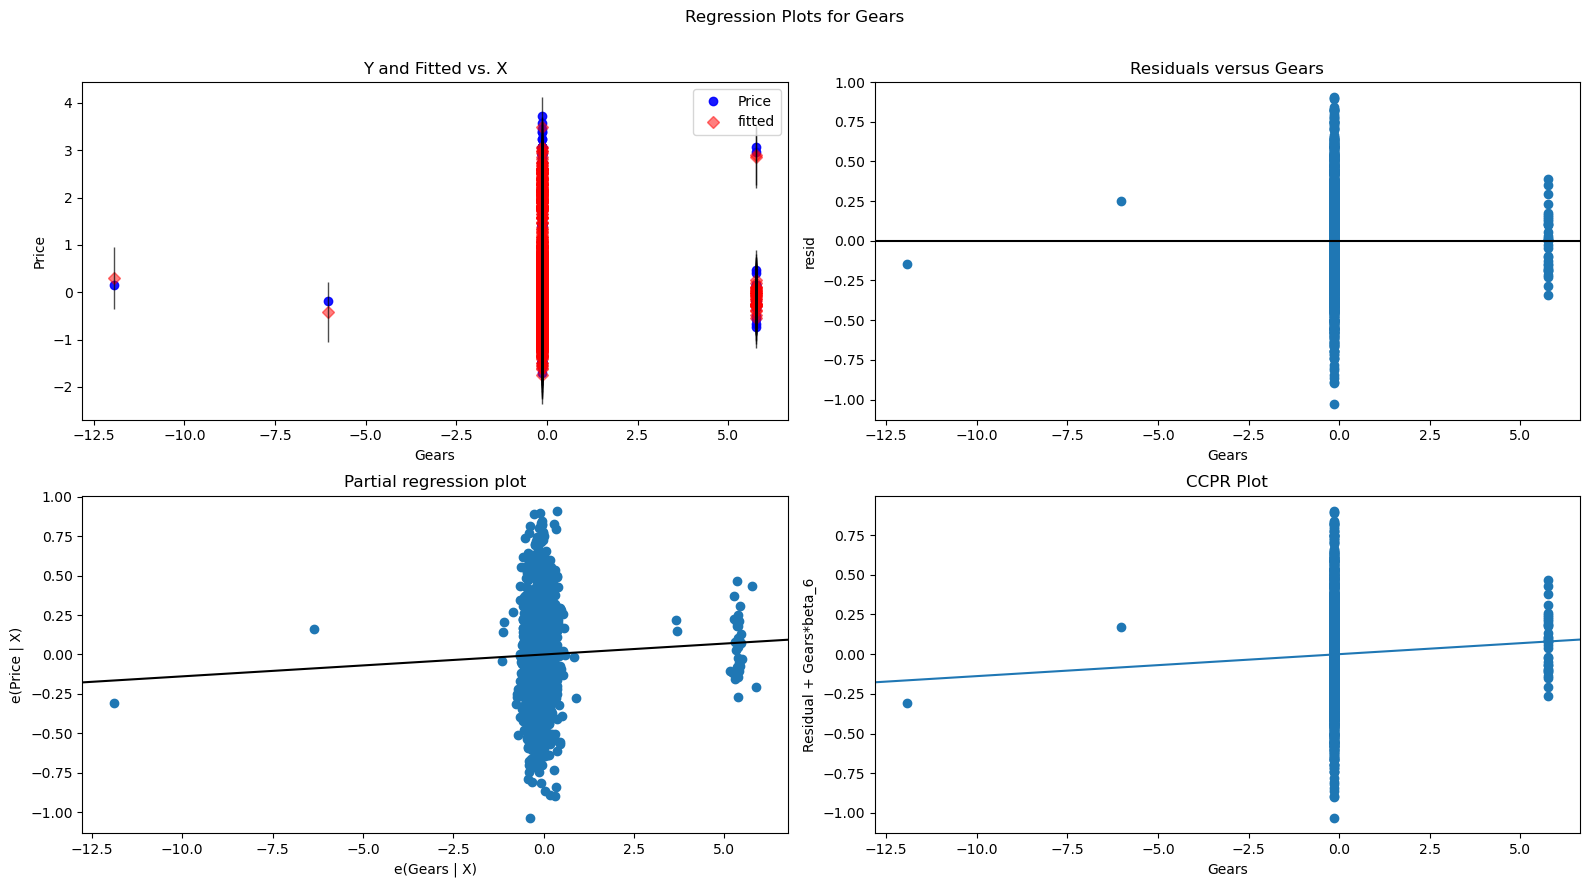

In [89]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()
eval_env: 1

In [93]:
#VIF ( Variance Inflation Factor )
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
y = df_standard_scaled.drop(['Price'], axis=1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
6,QT,4.86
7,Weight,4.74
3,CC,3.73
0,Age,2.09
2,HP,2.09
1,KM,1.86
4,Doors,1.34
5,Gears,1.08


In [94]:
r_sqr_age = smf.ols('Age~HP+Weight+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_weight = smf.ols('Weight~HP+Age+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_cc = smf.ols('CC~HP+Weight+Age+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = smf.ols('HP~Age+Weight+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_qt = smf.ols('QT~HP+Weight+CC+Doors+Age+Gears+KM', dataframe).fit().rsquared
vif_qt = 1/(1-r_sqr_qt)
r_sqr_km = smf.ols('KM~HP+Weight+CC+Doors+QT+Gears+Age', dataframe).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = smf.ols('Gears~HP+Weight+CC+Doors+QT+Age+KM', dataframe).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_doors = smf.ols('Doors~HP+Weight+CC+Age+QT+Gears+KM', dataframe).fit().rsquared
vif_doors = 1/(1-r_sqr_doors)

In [95]:
vif_frame = pd.DataFrame({'Variables':['Doors','HP','Weight','CC','Age','QT','Gears','KM'], 'VIF':[vif_doors,vif_hp,vif_weight,vif_cc,vif_age,vif_qt,vif_gears,vif_km]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

,VIF
Variables,
Gears,1.075124
Doors,1.336868
KM,1.858592
Age,2.091177
HP,2.094861
CC,3.725960
Weight,4.744228
QT,4.863714


In [96]:
#Simple Linear Model using QT
qt_model = smf.ols('Price~QT', data=df_standard_scaled).fit()
qt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     24.53
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           8.27e-07
Time:                        19:55:01   Log-Likelihood:                -1875.0
No. Observations:                1330   AIC:                             3754.
Df Residuals:                    1328   BIC:                             3764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.537e-16      0.027   9.33e-15      1.000      -0.053       0.053
QT             0.1347      0.027      4.952      0.000       0.081       0.188
==============================================================================
Omnibus:                      268.046   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.056
Skew:                           1.259   Prob(JB):                    5.15e-103
Kurtosis:                       4.469   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
gears_model = smf.ols('Price~Gears', data=df_standard_scaled).fit()
gears_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.08310
Date:                Thu, 29 Jun 2023   Prob (F-statistic):              0.773
Time:                        20:01:00   Log-Likelihood:                -1887.1
No. Observations:                1330   AIC:                             3778.
Df Residuals:                    1328   BIC:                             3789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.537e-16      0.027   9.25e-15      1.000      -0.054       0.054
Gears          0.0079      0.027      0.288      0.773      -0.046       0.062
==============================================================================
Omnibus:                      289.163   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.772
Skew:                           1.333   Prob(JB):                    4.10e-115
Kurtosis:                       4.547   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
gears_qt_weight_model = smf.ols('Price~Gears+QT', data=df_standard_scaled).fit()
gears_qt_weight_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     12.30
Date:                Thu, 29 Jun 2023   Prob (F-statistic):           5.08e-06
Time:                        20:01:10   Log-Likelihood:                -1875.0
No. Observations:                1330   AIC:                             3756.
Df Residuals:                    1327   BIC:                             3772.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.537e-16      0.027   9.33e-15      1.000      -0.053       0.053
Gears          0.0085      0.027      0.313      0.754      -0.045       0.062
QT             0.1347      0.027      4.952      0.000       0.081       0.188
==============================================================================
Omnibus:                      268.324   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.601
Skew:                           1.260   Prob(JB):                    3.92e-103
Kurtosis:                       4.468   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# Dropping highly correlated variables and insignificant variables

x = df_standard_scaled.drop(['Gears'], axis=1)
y = df_standard_scaled.drop(['Gears','Price'], axis=1)

In [100]:
x.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'QT', 'Weight'], dtype='object')

In [101]:
model_1 = smf.ols('Price~Age+KM+HP+CC+Doors+QT+Weight', data = x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1703.
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:01:59   Log-Likelihood:                -354.65
No. Observations:                1330   AIC:                             725.3
Df Residuals:                    1322   BIC:                             766.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.431e-17      0.009   1.65e-15      1.000      -0.017       0.017
Age           -0.6233      0.013    -49.609      0.000      -0.648      -0.599
KM            -0.1743      0.012    -14.750      0.000      -0.197      -0.151
HP             0.0360      0.012      2.915      0.004       0.012       0.060
CC            -0.1329      0.017     -7.955      0.000      -0.166      -0.100
Doors         -0.0493      0.010     -5.016      0.000      -0.069      -0.030
QT            -0.1350      0.019     -7.057      0.000      -0.172      -0.097
Weight         0.4850      0.019     25.656      0.000       0.448       0.522
==============================================================================
Omnibus:                        4.861   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.872
Skew:                           0.148   Prob(JB):                       0.0875
Kurtosis:                       2.984   Cond. No.                         4.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# ^Observation: As our Multicollinearity problem has been solved
## Feature Selection Techniques in Machine Learning

In [102]:
data.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


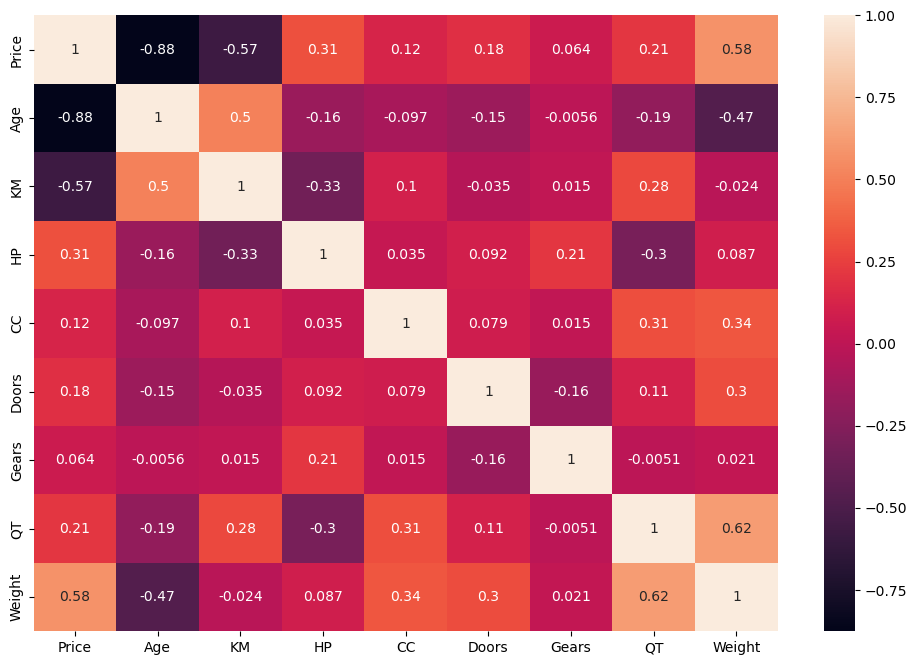

In [103]:
plt.figure(figsize=(12,8))
sns.heatmap(
    data.corr(),
    annot=True);

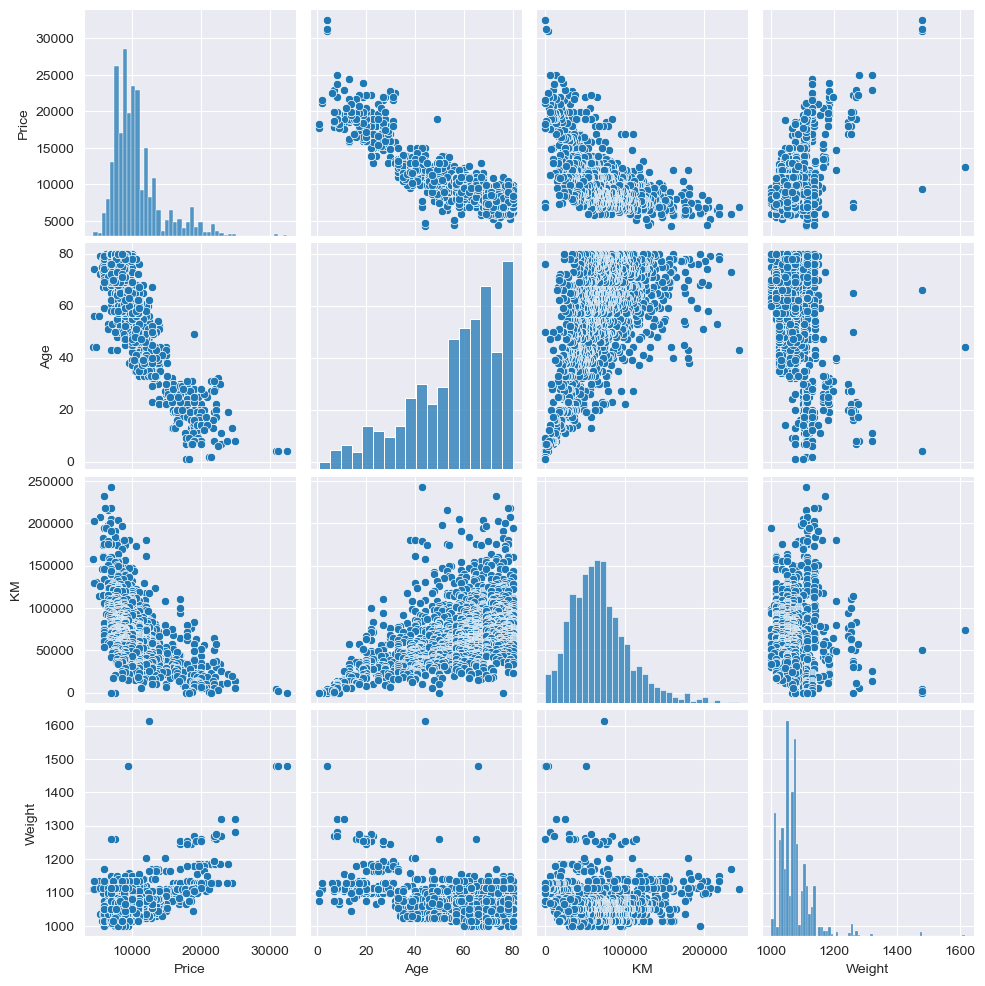

In [104]:
sns.set_style(style='darkgrid')
sns.pairplot(data[continuous_feature]);

In [105]:
df_standard_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.057454,-1.915503,0.136289,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
1,1.446875,-1.746462,-0.576515,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
2,1.057454,-1.521074,-0.848065,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
3,0.797839,-1.408380,-0.204921,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
4,2.079684,-1.690115,0.755851,-0.883769,2.526466,-1.067888,-0.137393,3.424789,4.441570


In [106]:
array = df_standard_scaled.values
x = array[:,1:]
y = array[:,1]

<IPython.core.display.Javascript object>

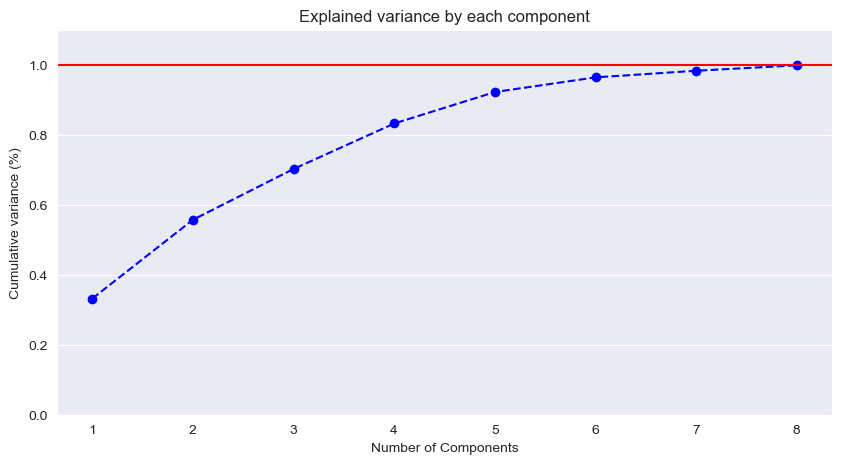

In [107]:
# PCA
pca_var = PCA()
pca_var.fit(x)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+x.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+x.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [108]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var 

array([0.33354904, 0.22519775, 0.1451224 , 0.12991156, 0.08985917,
       0.04191581, 0.01895074, 0.01549353])

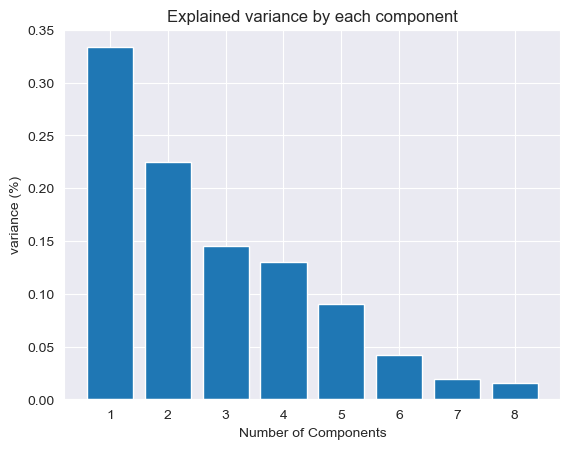

In [109]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component');

In [110]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 33.35,  55.87,  70.38,  83.37,  92.36,  96.55,  98.45, 100.  ])

In [111]:
# PCA
pca = PCA()
pca_std = pca.fit_transform(x)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

<IPython.core.display.Javascript object>

(1330, 8)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,4.829707,0.064931,-0.190264,-2.190636,1.159079,0.025216,-0.015311,-0.514560
1,4.679884,0.404151,-0.150193,-2.314266,1.205529,-0.589953,-0.009888,-0.474104
2,4.660639,0.468144,-0.154145,-2.295954,1.226273,-0.921497,0.114514,-0.377730
3,4.744045,0.012750,-0.214820,-2.074836,1.192697,-0.529197,0.180736,-0.380472
4,5.995403,-0.033057,-0.328856,-1.946975,1.098213,0.357084,1.346511,0.465162


In [112]:
dataframe.Price

0       13750
1       14950
2       13750
3       12950
4       16900
        ...  
1325     8450
1326     7500
1327    10845
1328     8500
1329     7250
Name: Price, Length: 1330, dtype: int64

In [113]:
pca_std_df['Price'] = y
pca_std_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Price
0,4.829707,0.064931,-0.190264,-2.190636,1.159079,0.025216,-0.015311,-0.514560,-1.915503
1,4.679884,0.404151,-0.150193,-2.314266,1.205529,-0.589953,-0.009888,-0.474104,-1.746462
2,4.660639,0.468144,-0.154145,-2.295954,1.226273,-0.921497,0.114514,-0.377730,-1.521074
3,4.744045,0.012750,-0.214820,-2.074836,1.192697,-0.529197,0.180736,-0.380472,-1.408380
4,5.995403,-0.033057,-0.328856,-1.946975,1.098213,0.357084,1.346511,0.465162,-1.690115


In [114]:
import statsmodels.formula.api as sm
pca_model= sm.ols('Price~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8', data= pca_std_df).fit()
pca_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.040e+32
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:05:12   Log-Likelihood:                 43742.
No. Observations:                1330   AIC:                        -8.747e+04
Df Residuals:                    1321   BIC:                        -8.742e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.061e-15   3.47e-17     30.587      0.000    9.93e-16    1.13e-15
PC1           -0.1952   2.12e-17   -9.2e+15      0.000      -0.195      -0.195
PC2           -0.5630   2.58e-17  -2.18e+16      0.000      -0.563      -0.563
PC3           -0.0925   3.22e-17  -2.87e+15      0.000      -0.092      -0.092
PC4            0.4131    3.4e-17   1.21e+16      0.000       0.413       0.413
PC5            0.0314   4.09e-17   7.69e+14      0.000       0.031       0.031
PC6           -0.6137   5.99e-17  -1.02e+16      0.000      -0.614      -0.614
PC7            0.2681   8.91e-17   3.01e+15      0.000       0.268       0.268
PC8            0.1273   9.85e-17   1.29e+15      0.000       0.127       0.127
==============================================================================
Omnibus:                       84.792   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.352
Skew:                          -0.066   Prob(JB):                     1.53e-78
Kurtosis:                       5.540   Cond. No.                         4.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
from sklearn.metrics import mean_squared_error
transformer_y = StandardScaler().fit(dataframe['Price'].to_numpy().reshape(-1,1))
# Scale the test dataset
y_train_scal = transformer_y.transform(dataframe['Price'].to_numpy().reshape(-1,1))

# Predict with the trained model
predict = pd.DataFrame(pca_model.predict(pca_std_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(dataframe.Price, predict_unscaled)))
print('R2_score : ', pca_model.rsquared)
print('R2_Adjusted_score : ', pca_model.rsquared_adj)
print("RMSE : ", rmse_linear)

R2_score :  1.0
R2_Adjusted_score :  1.0
RMSE :  6012.984866656379


In [117]:
pca_std_df['Price'] = dataframe['Price']
pca_std_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Price
0,4.829707,0.064931,-0.190264,-2.190636,1.159079,0.025216,-0.015311,-0.514560,13750
1,4.679884,0.404151,-0.150193,-2.314266,1.205529,-0.589953,-0.009888,-0.474104,14950
2,4.660639,0.468144,-0.154145,-2.295954,1.226273,-0.921497,0.114514,-0.377730,13750
3,4.744045,0.012750,-0.214820,-2.074836,1.192697,-0.529197,0.180736,-0.380472,12950
4,5.995403,-0.033057,-0.328856,-1.946975,1.098213,0.357084,1.346511,0.465162,16900


In [118]:
x_train, x_test, y_train, y_test = train_test_split(pca_std_df.iloc[:,:-1], pca_std_df.iloc[:,-1],test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

<IPython.core.display.Javascript object>

((931, 8), (399, 8), (931,), (399,))

In [119]:
from sklearn.preprocessing import StandardScaler

#Scaling 
transformer_y = StandardScaler().fit(y_train.to_numpy().reshape(-1,1)) 
y_train_scal = transformer_y.transform(y_train.to_numpy().reshape(-1,1))
y_test_scal = transformer_y.transform(y_test.to_numpy().reshape(-1,1))

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train_scal)

<IPython.core.display.Javascript object>

LinearRegression()

In [120]:
# Predict with the trained model
prediction = regressor_linear.predict(x_test)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)


<IPython.core.display.Javascript object>

CV:  0.9010967686242178
R2_score (train):  0.9058327433544345
R2_score (test):  0.8859113536008999
RMSE using all features:  1044.4860686202712


In [ ]:
#Forward Selection

In [121]:
X = dataframe.drop('Price', axis =1)
Y = dataframe[['Price']]
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [122]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) < threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, -0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [123]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state=0)

x_train.shape, x_test.shape , y_train.shape, y_test.shape

<IPython.core.display.Javascript object>

((931, 8), (399, 8), (931, 1), (399, 1))

In [124]:
# step forward feature selection
 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=4, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(x_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.3s finished

[2023-06-29 20:08:21] Features: 1/4 -- score: 0.85977268743668[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.4s finished

[2023-06-29 20:08:26] Features: 2/4 -- score: 0.8846315013301079[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.3s finished

[2023-06-29 20:08:30] Features: 3/4 -- score: 0.9046698340938129[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

In [125]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [126]:
sfs1.k_feature_idx_

(0, 1, 3, 7)

In [127]:
x_train.columns[list(sfs1.k_feature_idx_)]

Index(['Age', 'KM', 'CC', 'Weight'], dtype='object')

In [128]:
# checking the magnitude of coefficients
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

f = 'Price ~ Age + KM + HP + CC + Doors + Weight + QT + Gears'
reg_results = sm.ols(f, data=dataframe).fit()

err_series = reg_results.params - reg_results.conf_int()[0]
err_series

coef_df = pd.DataFrame({'coef': reg_results.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
print(coef_df)

         coef         err varname
0 -108.257335    4.277641     Age
1   -0.015465    0.002046      KM
2    7.853334    5.958445      HP
3   -2.273119    0.571776      CC
4 -149.187276   63.623867   Doors
5   36.976781    2.837352  Weight
6  -11.618726    3.190591      QT
7  251.436316  320.864248   Gears


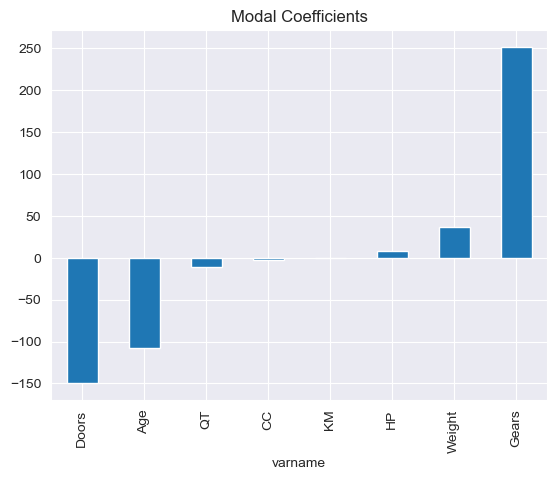

In [129]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='Modal Coefficients');

In [130]:
#Ridge Regression

from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(x_train,y_train)

Ridge(alpha=0.05, normalize=True)

In [131]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridgeReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_ridge_train = ridgeReg.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridgeReg.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

<IPython.core.display.Javascript object>

CV:  0.8990715604329076
R2_score (train):  0.9036517538087957
R2_score (test):  0.8828983675352516
RMSE:  1058.1881959787938


In [132]:
ridgeReg.coef_.flatten()

array([-1.06751832e+02, -1.77878403e-02,  8.51378690e+00, -1.62288173e+00,
       -6.35551858e+01,  1.93236473e+02, -7.21634741e+00,  2.99844117e+01])

In [133]:
coef_df = pd.DataFrame({'coef': ridgeReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

         coef varname
0 -106.751832     Age
1   -0.017788      KM
2    8.513787      HP
3   -1.622882      CC
4  -63.555186   Doors
5  193.236473   Gears
6   -7.216347      QT
7   29.984412  Weight


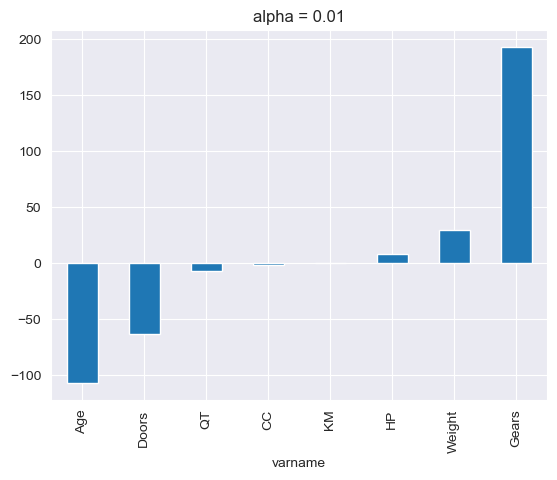

In [134]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.01');

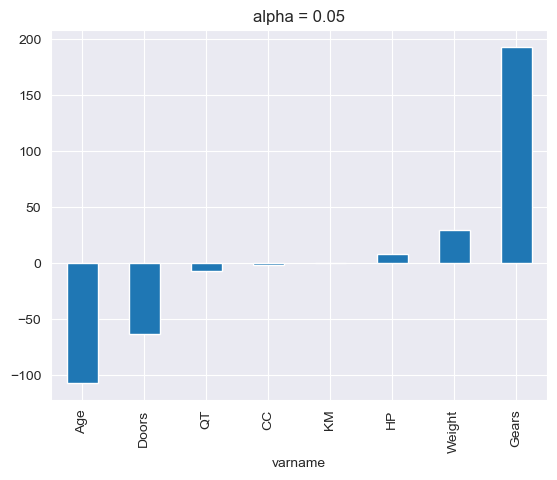

In [135]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05');

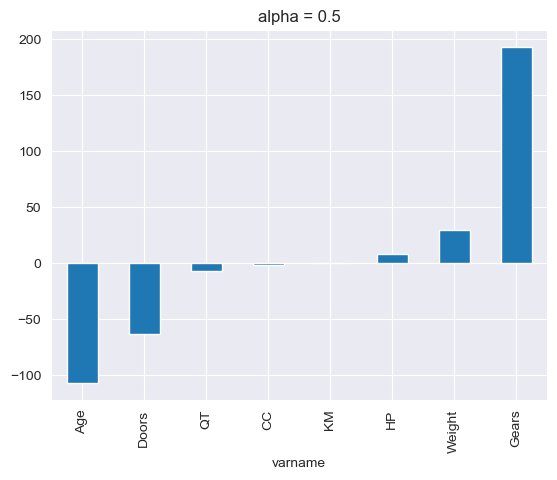

In [136]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.5');

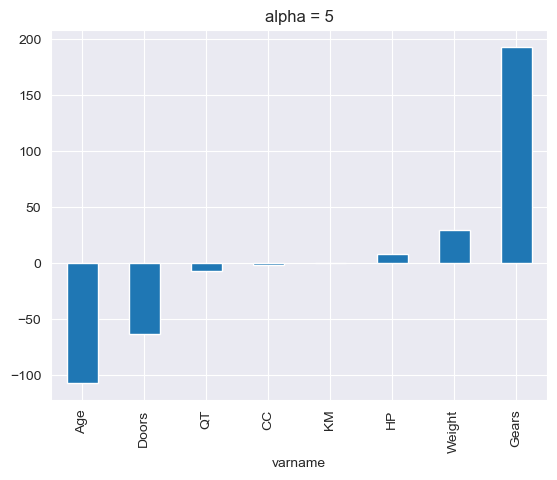

In [137]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 5');


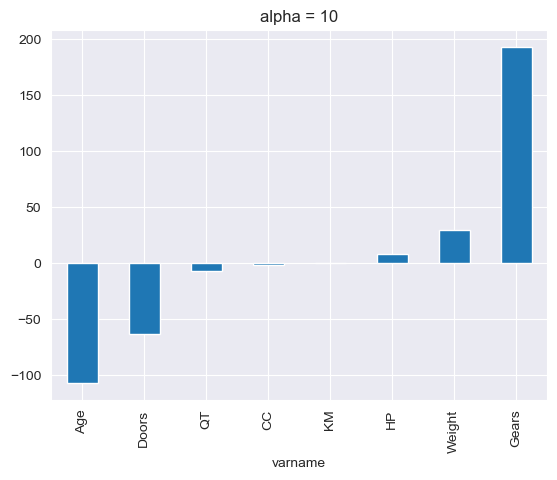

In [138]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 10');

In [139]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.5, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.5))])

In [140]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

<IPython.core.display.Javascript object>

CV:  0.8866230882384585
R2_score (train):  0.9209526910958892
R2_score (test):  0.898782112552966
RMSE:  983.8073715686129


In [141]:
from sklearn.feature_selection import SelectFromModel
sel_ridge = SelectFromModel(Ridge(alpha=0.05))
sel_ridge.fit(x_train, y_train)

sel_ridge.get_support()

# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_ridge.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

print(x_train.columns[(sel_ridge.get_support())])

total features: 8
selected features: 3
Index(['Age', 'Doors', 'Gears'], dtype='object')


In [ ]:
#LASSO Regression


In [142]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.5, normalize=True)

lassoReg.fit(x_train,y_train)

pred = lassoReg.predict(x_test)

In [143]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = lassoReg, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_lasso_train = lassoReg.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lassoReg.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("CV: ", cv_ridge.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_ridge)

<IPython.core.display.Javascript object>

CV:  0.9006401986073614
R2_score (train):  0.9054058676328888
R2_score (test):  0.8840091470723661
RMSE:  1053.1574613699338


In [144]:
coef_df = pd.DataFrame({'coef': lassoReg.coef_.flatten(),
                        'varname': dataframe.columns.values[1:]
                       })
print(coef_df)

         coef varname
0 -111.687292     Age
1   -0.016277      KM
2    5.090988      HP
3   -1.604930      CC
4  -75.543700   Doors
5  131.959918   Gears
6  -10.360179      QT
7   32.226234  Weight


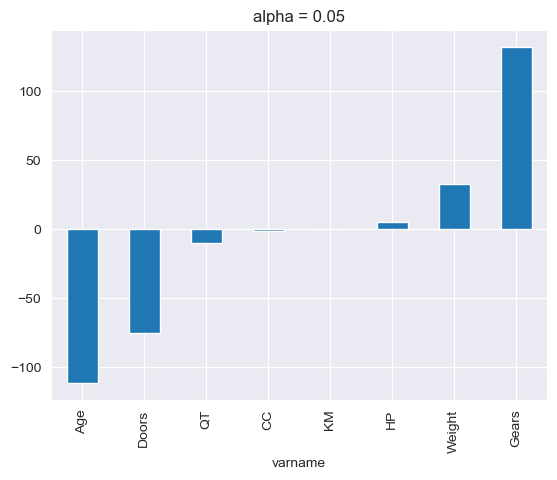

In [145]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05');

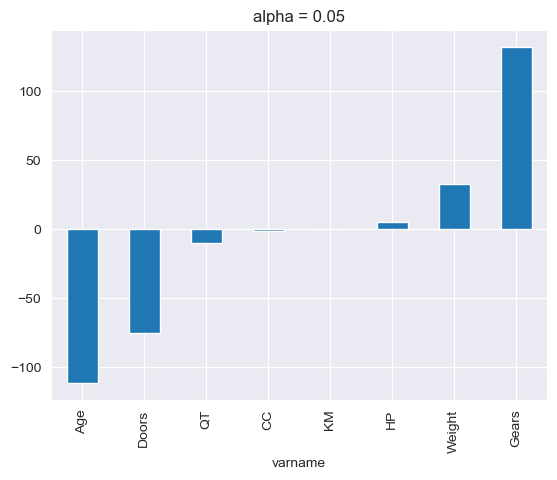

In [146]:
#checking the magnitude of coefficients

coef = pd.Series(data = coef_df.coef.values,index = coef_df.varname).sort_values()

coef.plot(kind='bar', title='alpha = 0.05');

In [147]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.5, fit_intercept=True, tol = 0.0199, max_iter=2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.5, max_iter=2000, tol=0.0199))])

In [148]:
# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = x_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

<IPython.core.display.Javascript object>

CV:  0.8868613507163354
R2_score (train):  0.920892824744604
R2_score (test):  0.8991355999668053
RMSE:  982.0879734916062


In [149]:
sel_lasso = SelectFromModel(Lasso(alpha=100))
sel_lasso.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [150]:
sel_lasso.get_support()

array([ True,  True,  True,  True, False, False,  True,  True])

In [151]:
# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_lasso.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_lasso.estimator_.coef_ == 0)))


total features: 8
selected features: 6
features with coefficients shrank to zero: 2


In [152]:
x_train.columns[(sel_lasso.get_support())]

Index(['Age', 'KM', 'HP', 'CC', 'QT', 'Weight'], dtype='object')

In [154]:
square_root_pred_y =np.square(sqrt_transformed_model.predict(df_sqrt_scaled[['Age','Weight','KM','HP','CC','QT','Doors','Gears']]))
cube_root_pred_y =pow(cbrt_transformed_model.predict(df_cbrt_scaled[['Age','Weight','KM','HP','CC','QT','Doors','Gears']]),3)
log_model_pred_y =np.exp(log_transformed_model.predict(df_log_scaled[['Age','Weight','KM','HP','CC','Doors']]))
square_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], square_root_pred_y))
cube_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], cube_root_pred_y))
log_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], log_model_pred_y))


In [158]:
print('Raw Model=', np.sqrt(raw_data_model.mse_resid),
      '\n''After Removing Influencers=', np.sqrt(final_model.mse_resid),
      '\n''After Log Transformation on both Model=', log_both_rmse,
      '\n''After Cube-root Transformation on both Model=', cube_root_both_rmse,
     '\n''After Sqaure Root Transformation on both Model=', square_root_both_rmse,
      '\n''After Removing Influencers from model', np.sqrt(final_model.mse_resid),
     '\n''Final Model without Multicollinearity Model=', rmse_linear)


Raw Model= 976.7658733249549 
After Removing Influencers= 975.9271399262797 
After Log Transformation on both Model= 1795.8265592099158 
After Cube-root Transformation on both Model= 1152.5577948742462 
After Sqaure Root Transformation on both Model= 1010.8979447569374 
After Removing Influencers from model 975.9271399262797 
Final Model without Multicollinearity Model= 6012.984866656379


In [159]:
rmse_compare = {'Raw Model': np.sqrt(raw_data_model.mse_resid),
      'After Removing Influencers': np.sqrt(final_model.mse_resid),
      'After Log Transformation Model': log_both_rmse,
      'After Cube-root Transformation Model': cube_root_both_rmse,
     'After Sqaure Root Transformation Model': square_root_both_rmse,
                'After Removing Influencers from model': np.sqrt(final_model.mse_resid),
   'Final Model without Multicollinearity Model': rmse_linear}
min(rmse_compare, key=rmse_compare.get)

'After Removing Influencers'

In [160]:
Final_model = smf.ols("Price~Age+KM+HP+CC+Doors+QT+Weight", data = x).fit()
# Finding rsquared values
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.982e+25
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:17:44   Log-Likelihood:                 34289.
No. Observations:                1330   AIC:                        -6.856e+04
Df Residuals:                    1322   BIC:                        -6.852e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2115   2.09e-12  -1.54e+12      0.000      -3.211      -3.211
Age            0.0563   3.45e-15   1.63e+13      0.000       0.056       0.056
KM         -3.351e-18   1.64e-18     -2.038      0.042   -6.58e-18   -1.25e-19
HP          1.617e-16   4.72e-15      0.034      0.973    -9.1e-15    9.42e-15
CC          -2.23e-17   4.59e-16     -0.049      0.961   -9.23e-16    8.78e-16
Doors      -1.429e-14   5.02e-14     -0.285      0.776   -1.13e-13    8.42e-14
QT           3.78e-17   2.57e-15      0.015      0.988      -5e-15    5.07e-15
Weight      7.726e-17   2.28e-15      0.034      0.973    -4.4e-15    4.56e-15
==============================================================================
Omnibus:                       37.225   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.602
Skew:                           0.359   Prob(JB):                     1.86e-08
Kurtosis:                       2.644   Cond. No.                     3.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

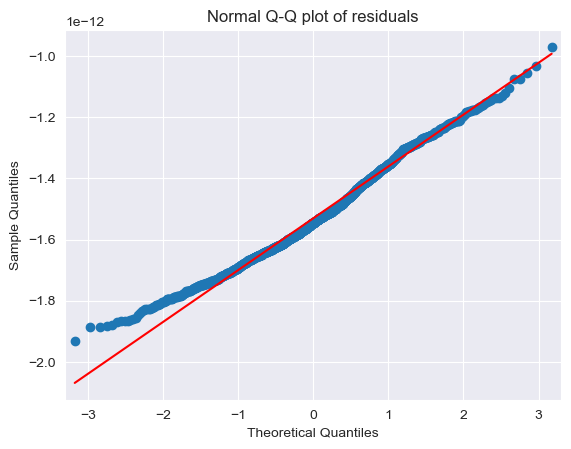

In [162]:
#Residual Analysis
#est for Normality of Residuals (Q-Q Plot)
#Residuals values  = y - yhat
import statsmodels.api as sm
sm.qqplot(Final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()


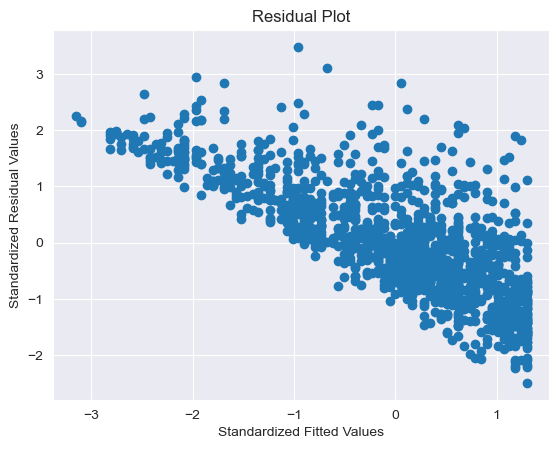

In [173]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(Final_model.fittedvalues), get_standardized_values(Final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [174]:
(t,_)= model_1.get_influence().cooks_distance
t

array([4.85673682e-03, 4.51530998e-04, 5.09008027e-03, ...,
       5.40507893e-03, 3.08454514e-05, 2.35254054e-03])

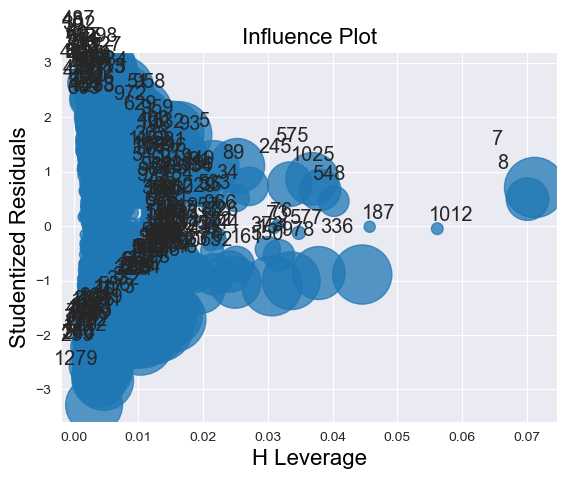

In [178]:
influence_plot(model_1)
plt.show()

eval_env: 1


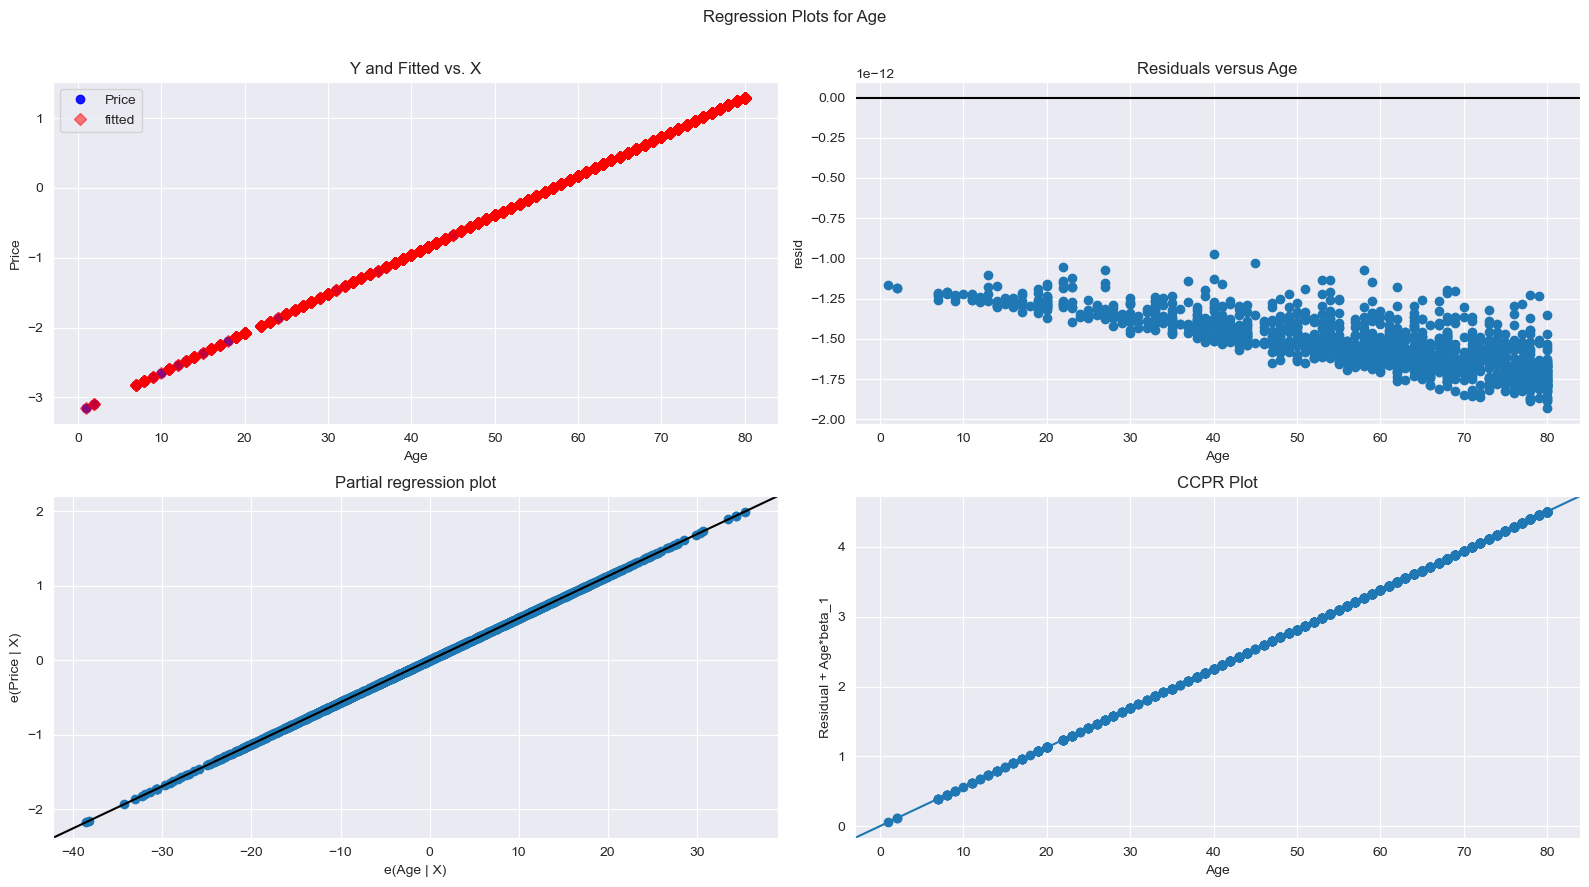

In [164]:
#Residual VS Regressors
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Age', fig=fig)
plt.show()

eval_env: 1


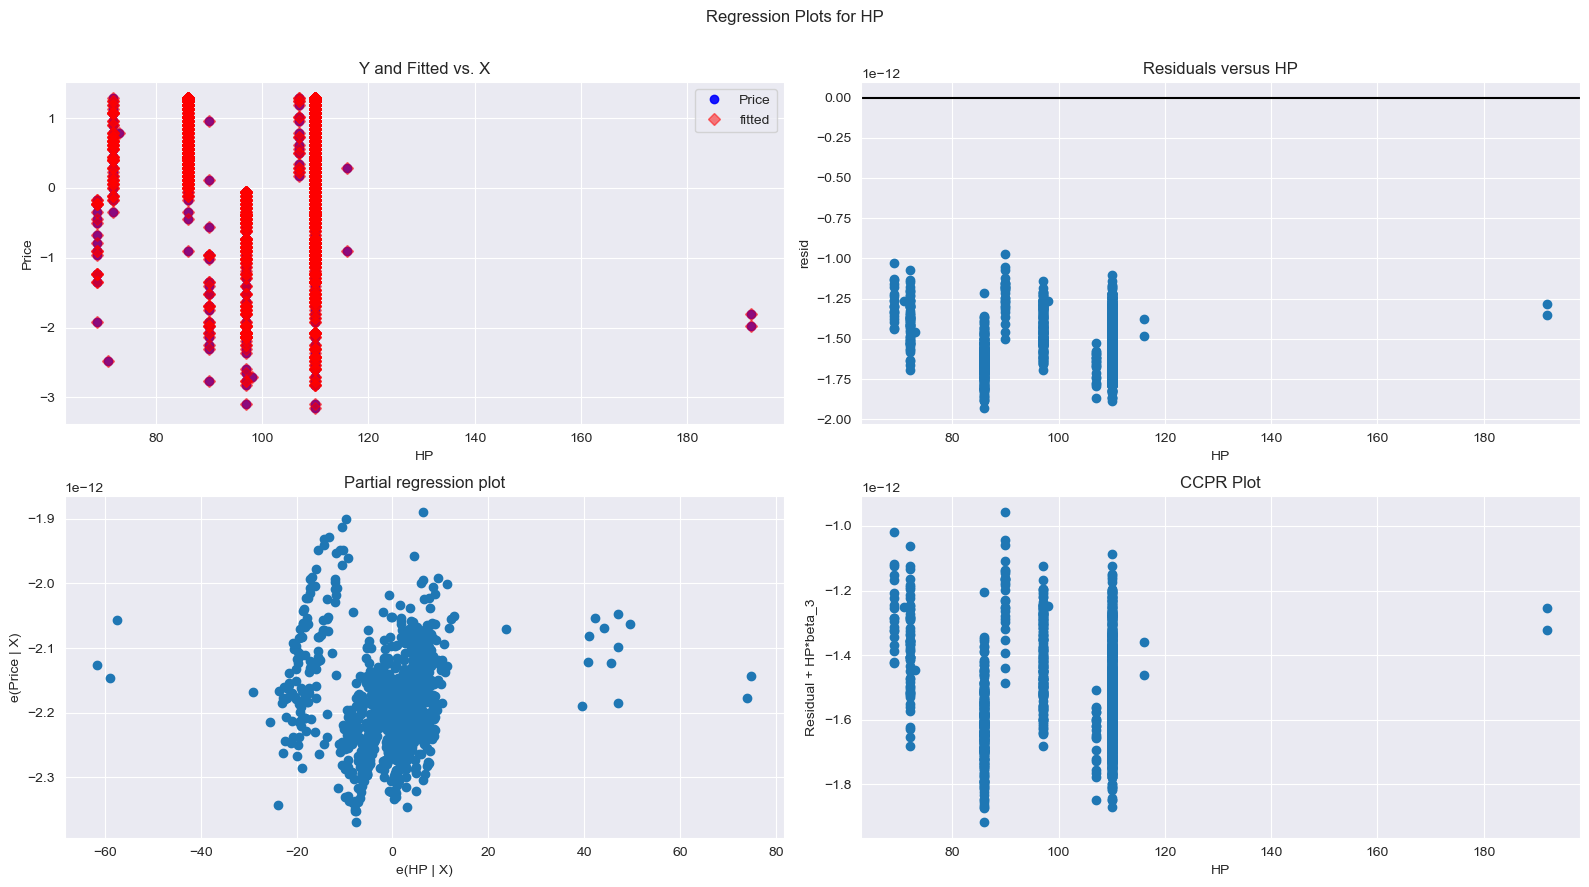

In [165]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'HP', fig=fig)
plt.show()

eval_env: 1


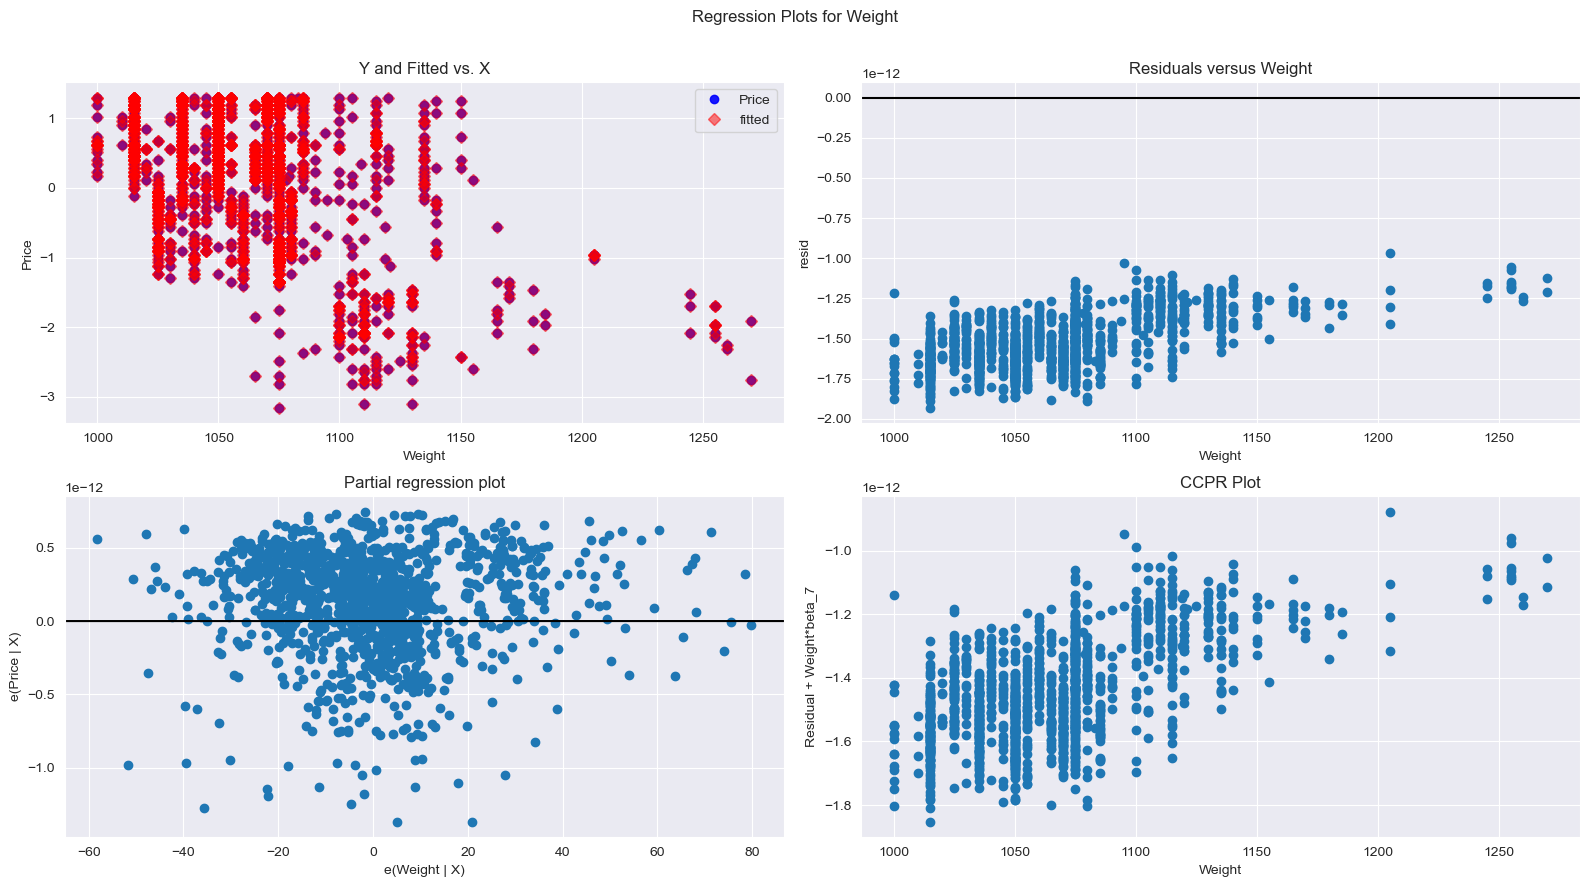

In [166]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Weight', fig=fig)
plt.show()

eval_env: 1


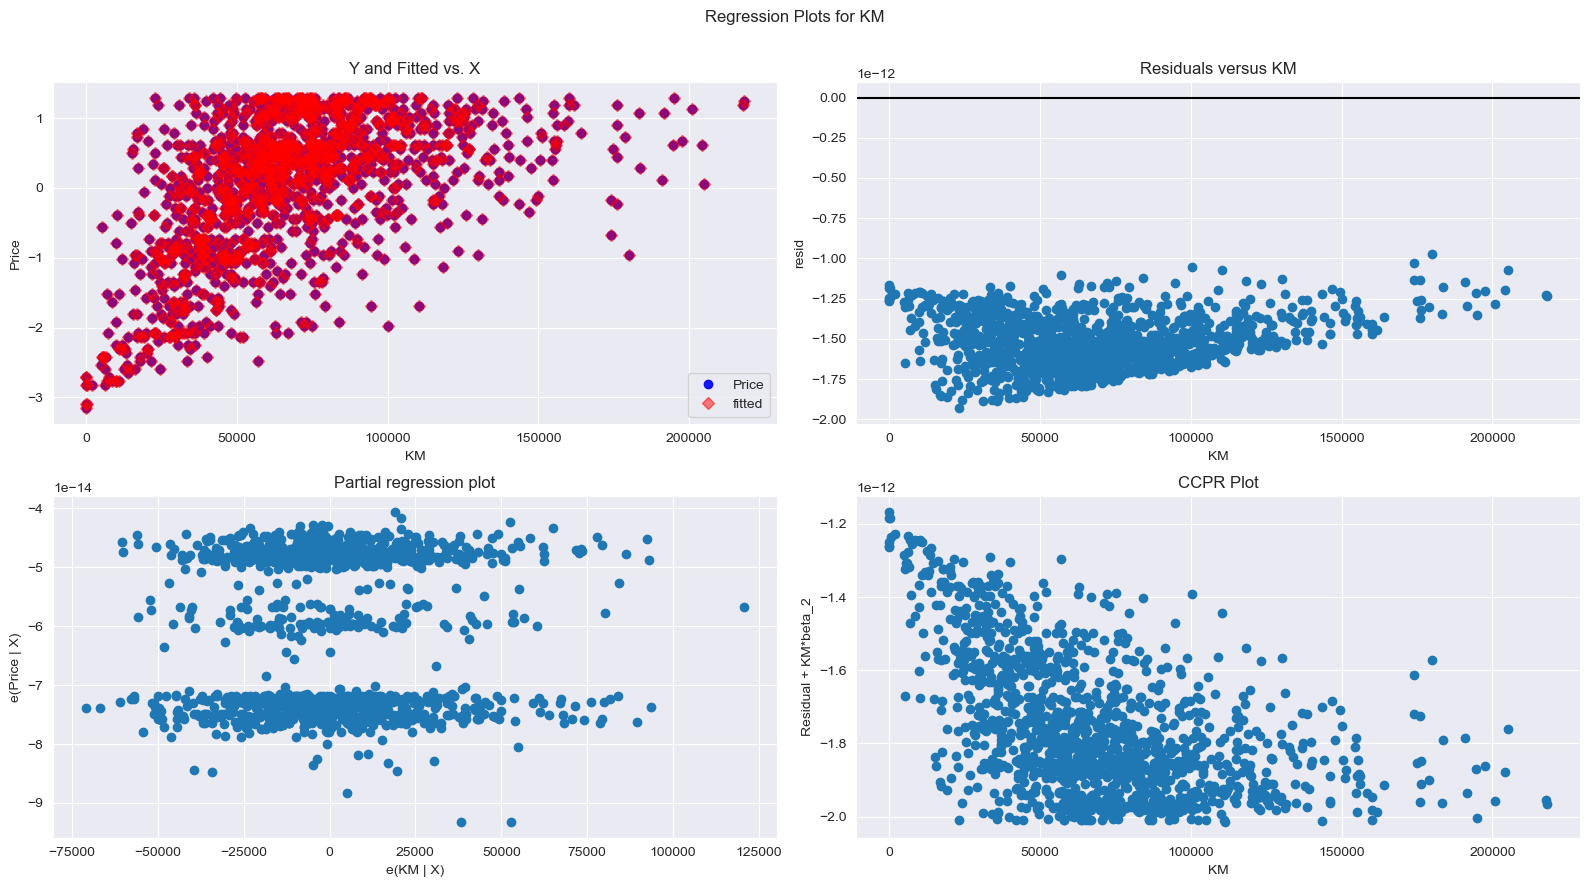

In [167]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'KM', fig=fig)
plt.show()

eval_env: 1


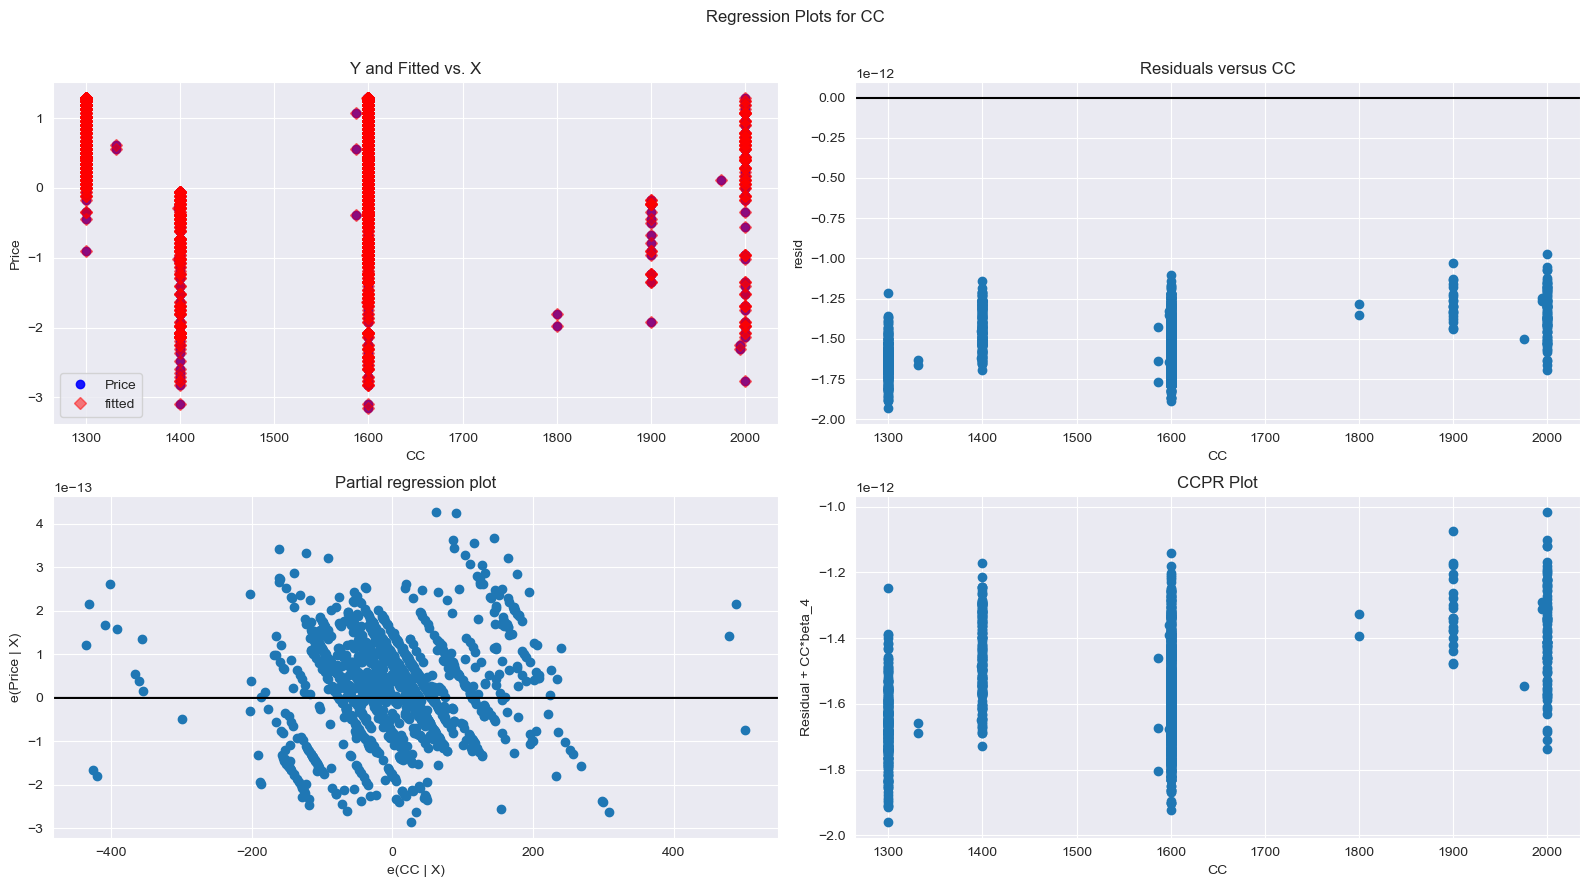

In [168]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'CC', fig=fig)
plt.show()

eval_env: 1


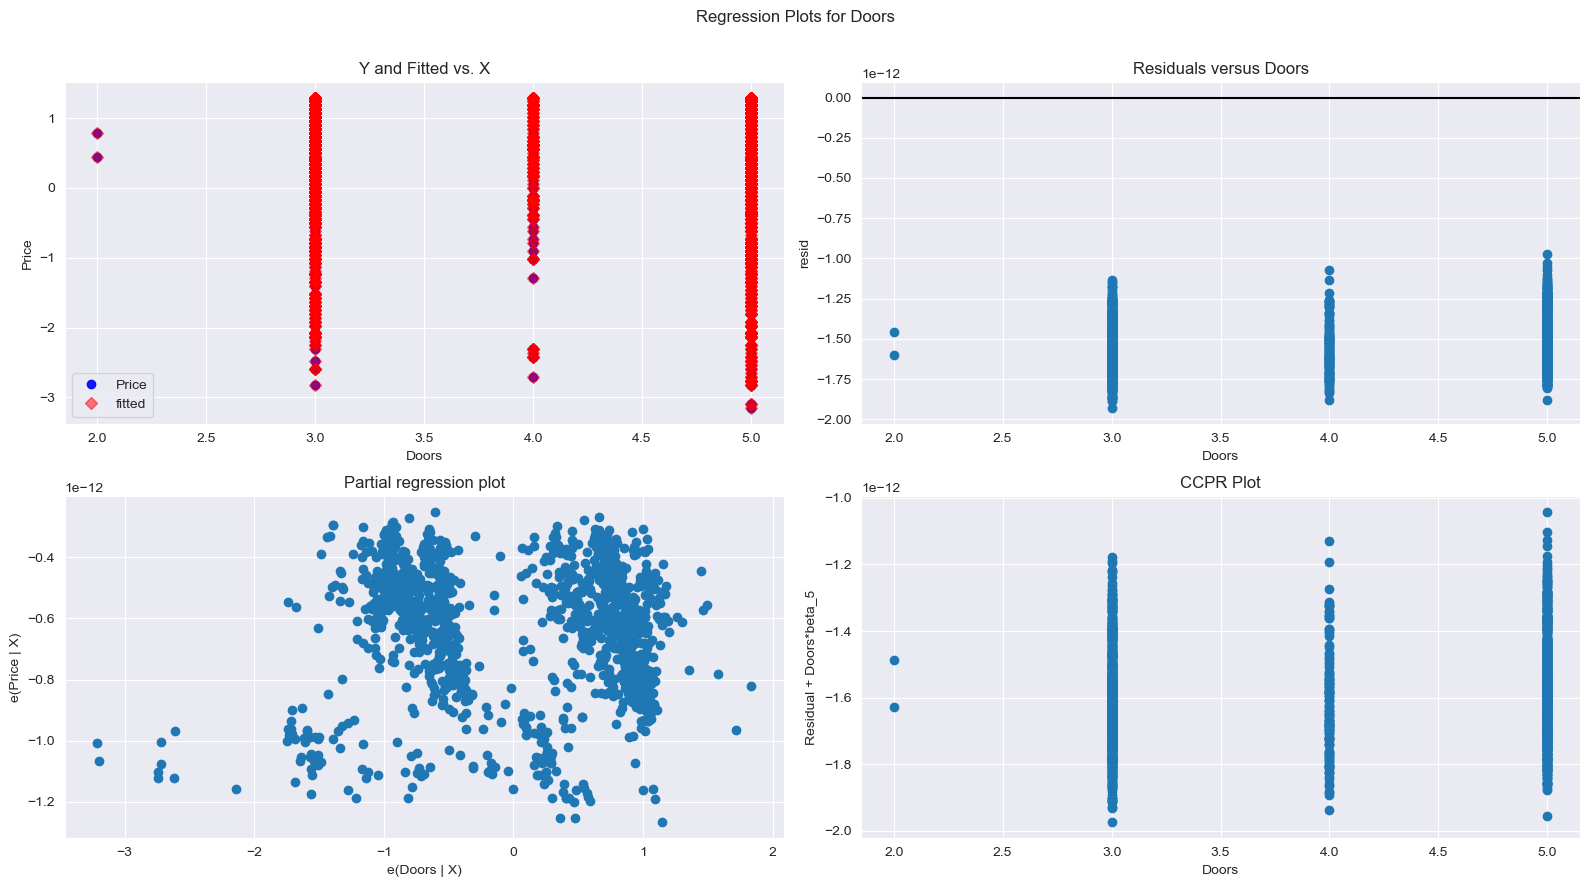

In [169]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Doors', fig=fig)
plt.show()

In [170]:
#Predicting values from Model using same dataset
x = dataframe[['Age','KM','HP','CC','Doors','QT','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','QT','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(Final_model.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
predict_unscaled

array([[262.68919299],
       [292.04034547],
       [331.17521545],
       ...,
       [742.09135021],
       [732.30763272],
       [722.52391523]])

In [171]:
(np.sqrt(mean_squared_error(y, predict_unscaled)))

10412.841934830263

In [172]:
predicted = pd.DataFrame(predict_unscaled,columns=['Predicted_Price'])
predicted['Price'] = dataframe.Price
predicted['Age'] = dataframe.Age
predicted['KM'] = dataframe.KM
predicted['Weight'] = dataframe.Weight
predicted['HP'] = dataframe.HP
predicted['CC'] = dataframe.CC
predicted['QT'] = dataframe.QT
predicted['Doors'] = dataframe.Doors
predicted


,Predicted_Price,Price,Age,KM,Weight,HP,CC,QT,Doors
0,262.689193,13750,23,72937,1165,90,2000,210,3
1,292.040345,14950,26,48000,1165,90,2000,210,3
2,331.175215,13750,30,38500,1170,90,2000,210,3
3,350.742650,12950,32,61000,1170,90,2000,210,3
4,301.824063,16900,27,94612,1245,90,2000,210,3
...,...,...,...,...,...,...,...,...,...
1325,820.361090,8450,80,23000,1015,86,1300,69,3
1326,712.740198,7500,69,20544,1025,86,1300,69,3
1327,742.091350,10845,72,19000,1015,86,1300,69,3
1328,732.307633,8500,71,17016,1015,86,1300,69,3
